### Correlations between biomass of individual species

Investigating this question: Do certain phytoplankton species group together (i.e. when one species increases so does the other and vice versa)?

The Spearman correlation is calculated for the biomass of each pair of species (-1 is perfect negative correlation, 1 is perfect positive correlation). Spearman correlation was used rather than Pearson because we are interested in any monotonic relationship between species' biomass, not just linear relationships. These correlations are displayed in a heat map. Hierarchical clustering is applied to show groupings of species that are all correlated with each other.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [16]:
phytotax = pd.read_csv('YOUR-PATH/#DATA/PhytoTax_PHISH_1.csv')

In [17]:
phytotax.head()

,Lake,Date,Year,Month,Day,species_code,speceis_name,density,biomass,need definition and how/why this matters to the other data set
0,114,5/30/2018,2018,5,30,2235,Ankistrodesmus spiralis Lemmermann,35920,2.24,NaN
1,114,7/11/2018,2018,7,11,2235,Ankistrodesmus spiralis Lemmermann,39683,2.61,NaN
2,114,8/1/2018,2018,8,1,2235,Ankistrodesmus spiralis Lemmermann,39683,2.47,NaN
3,114,9/12/2018,2018,9,12,2235,Ankistrodesmus spiralis Lemmermann,79366,4.81,NaN
4,114,8/29/2018,2018,8,29,1008,Aphanocapsa sp.,396830,39.68,NaN


In [18]:
phytotax['Lake'].unique()

array([114, 164, 223, 224, 239, 373, 442, 470, 625, 626, 658])

In [19]:
def calculate_corr(lake):
    phyto = phytotax[phytotax['Lake']==lake]
    phyto_pivot = phyto.pivot_table(index='Date', columns='species_code', values='biomass')
    phyto_pivot = phyto_pivot.fillna(0)
    corr = phyto_pivot.corr(method='spearman')
    
    return corr

In [20]:
cmap = sns.diverging_palette(215, 30, 96.9, 49.8, as_cmap=True)

#### Lake 114

In [21]:
corr = calculate_corr(114)

<Figure size 1800x1440 with 0 Axes>

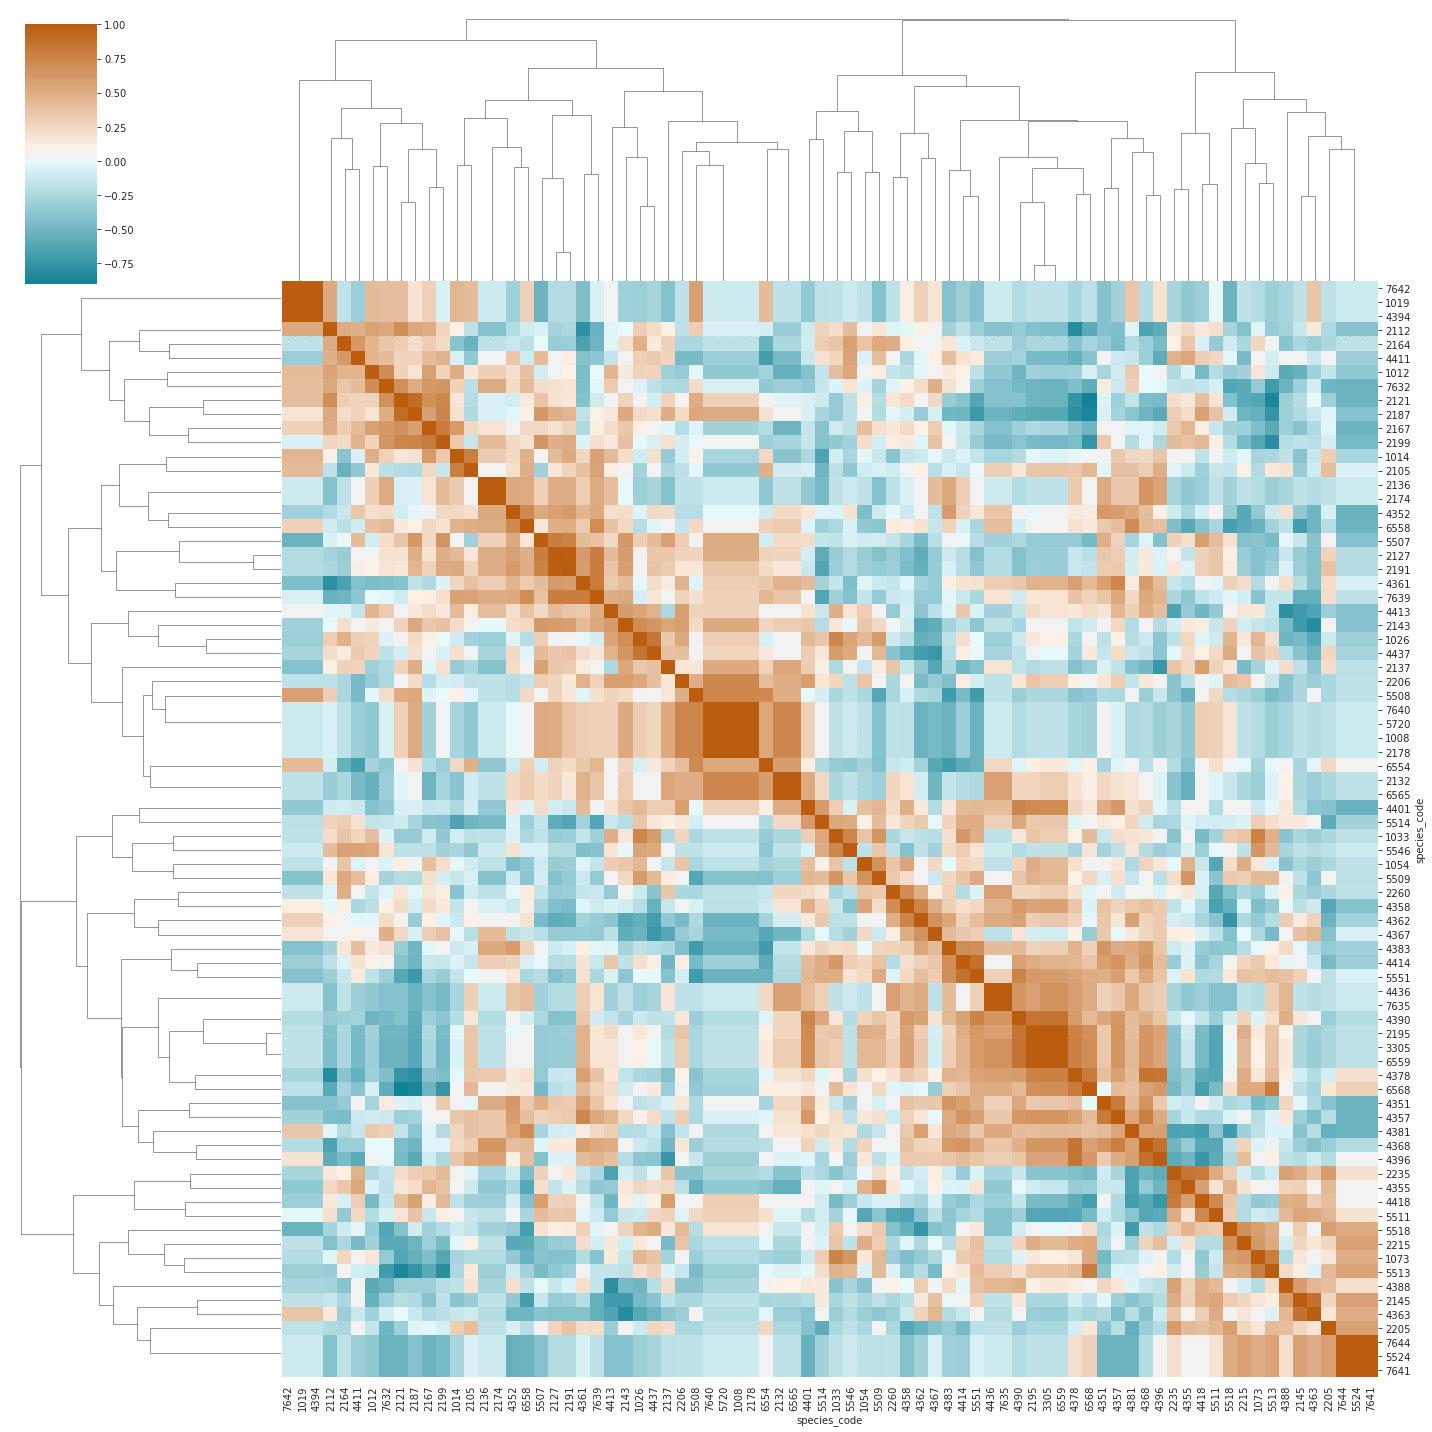

In [22]:
plt.figure(figsize=(25,20))
sns.clustermap(corr, cmap=cmap, figsize=(20,20))

#### Lake 164

In [23]:
corr = calculate_corr(164)

<Figure size 1800x1440 with 0 Axes>

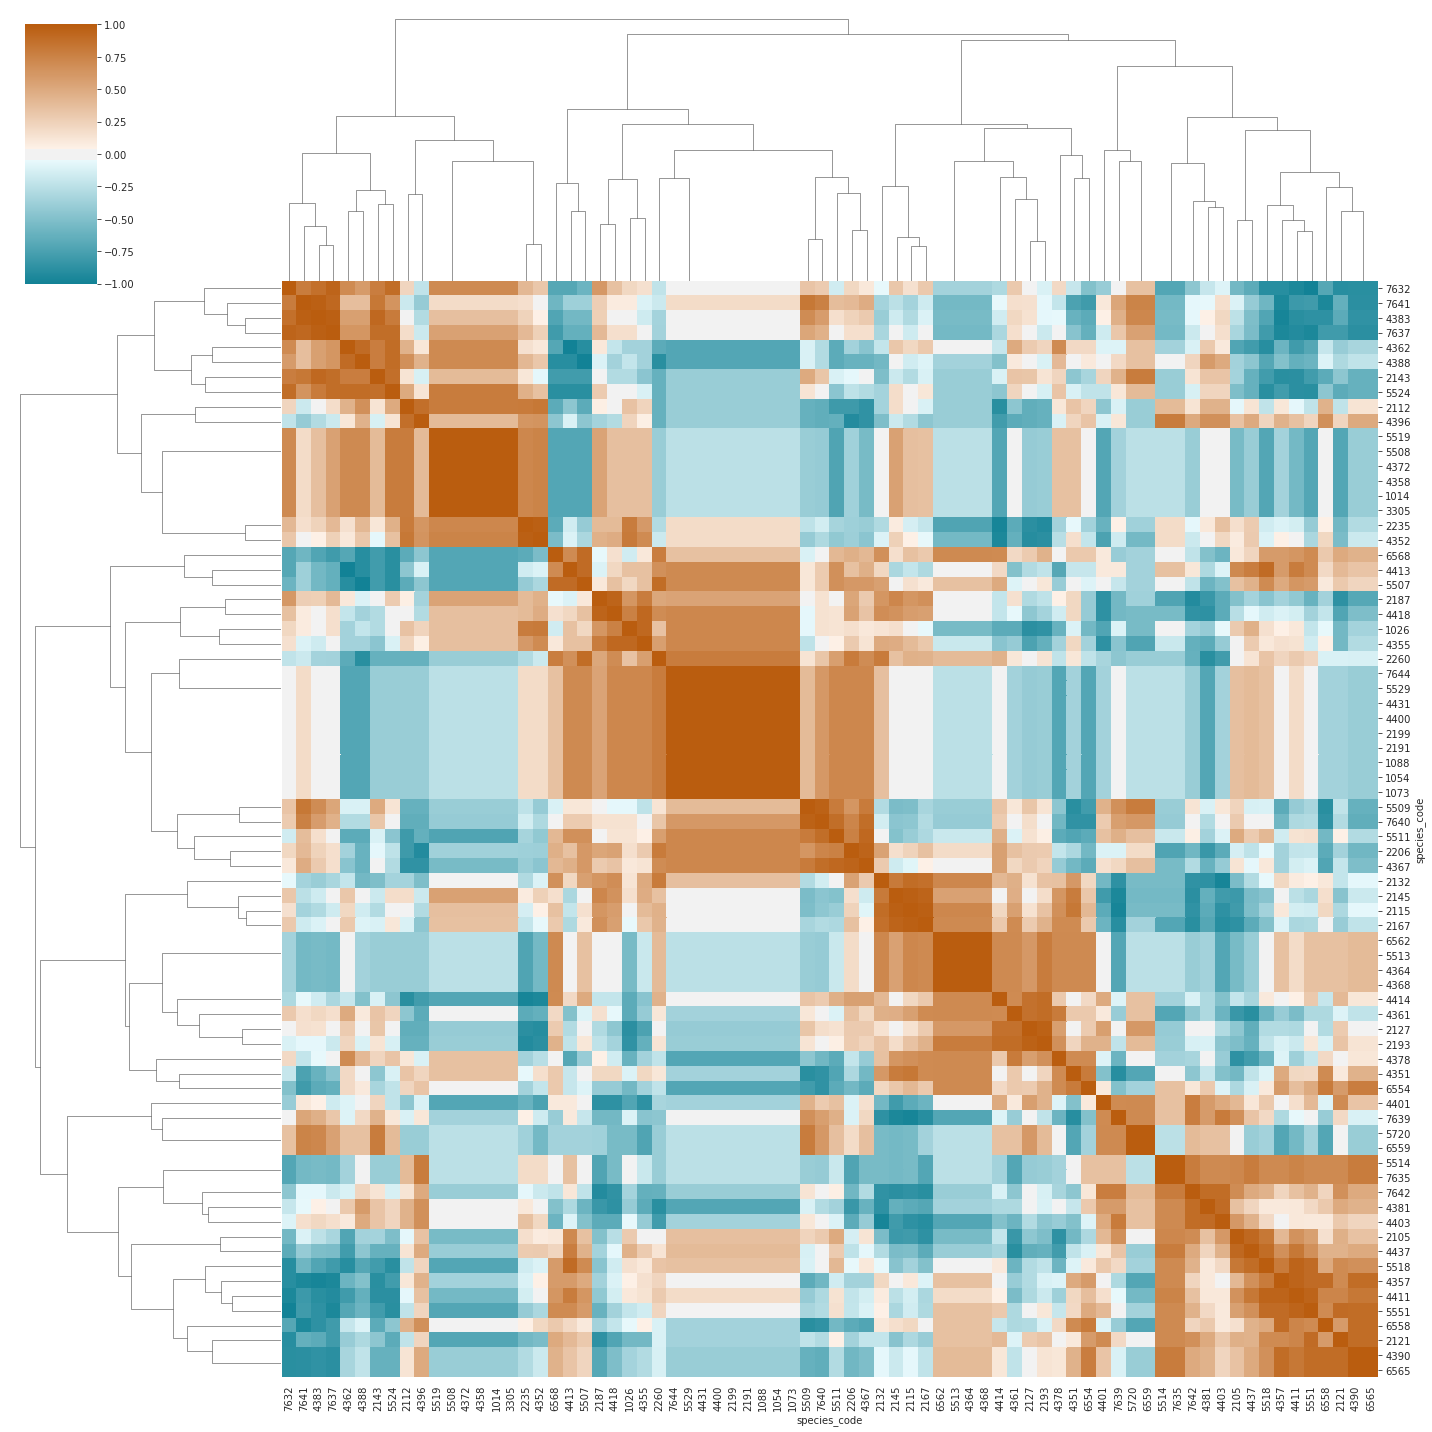

In [24]:
plt.figure(figsize=(25,20))
sns.clustermap(corr, cmap=cmap, figsize=(20,20))

#### Lake 223

In [25]:
corr = calculate_corr(223)

<Figure size 1800x1440 with 0 Axes>

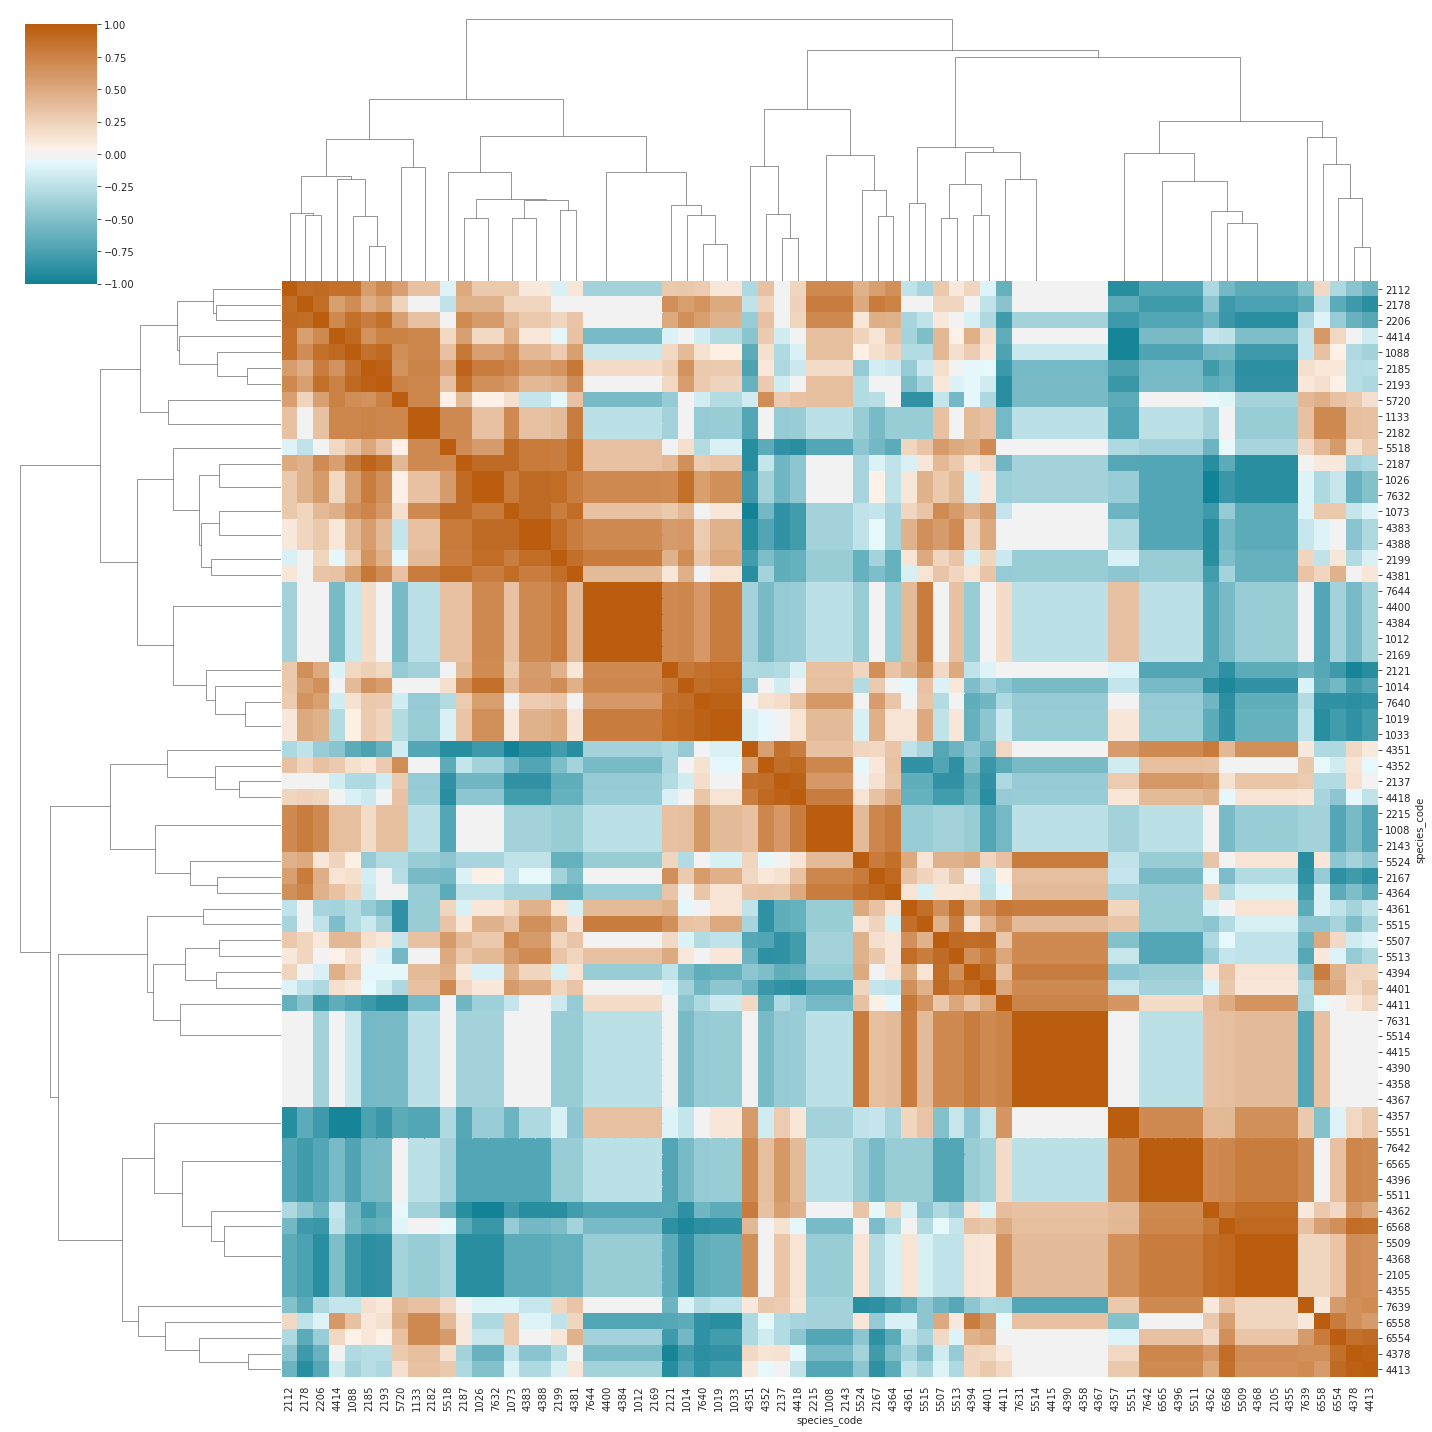

In [26]:
plt.figure(figsize=(25,20))
sns.clustermap(corr, cmap=cmap, figsize=(20,20))

#### Lake 224

In [27]:
corr = calculate_corr(224)

<Figure size 1800x1440 with 0 Axes>

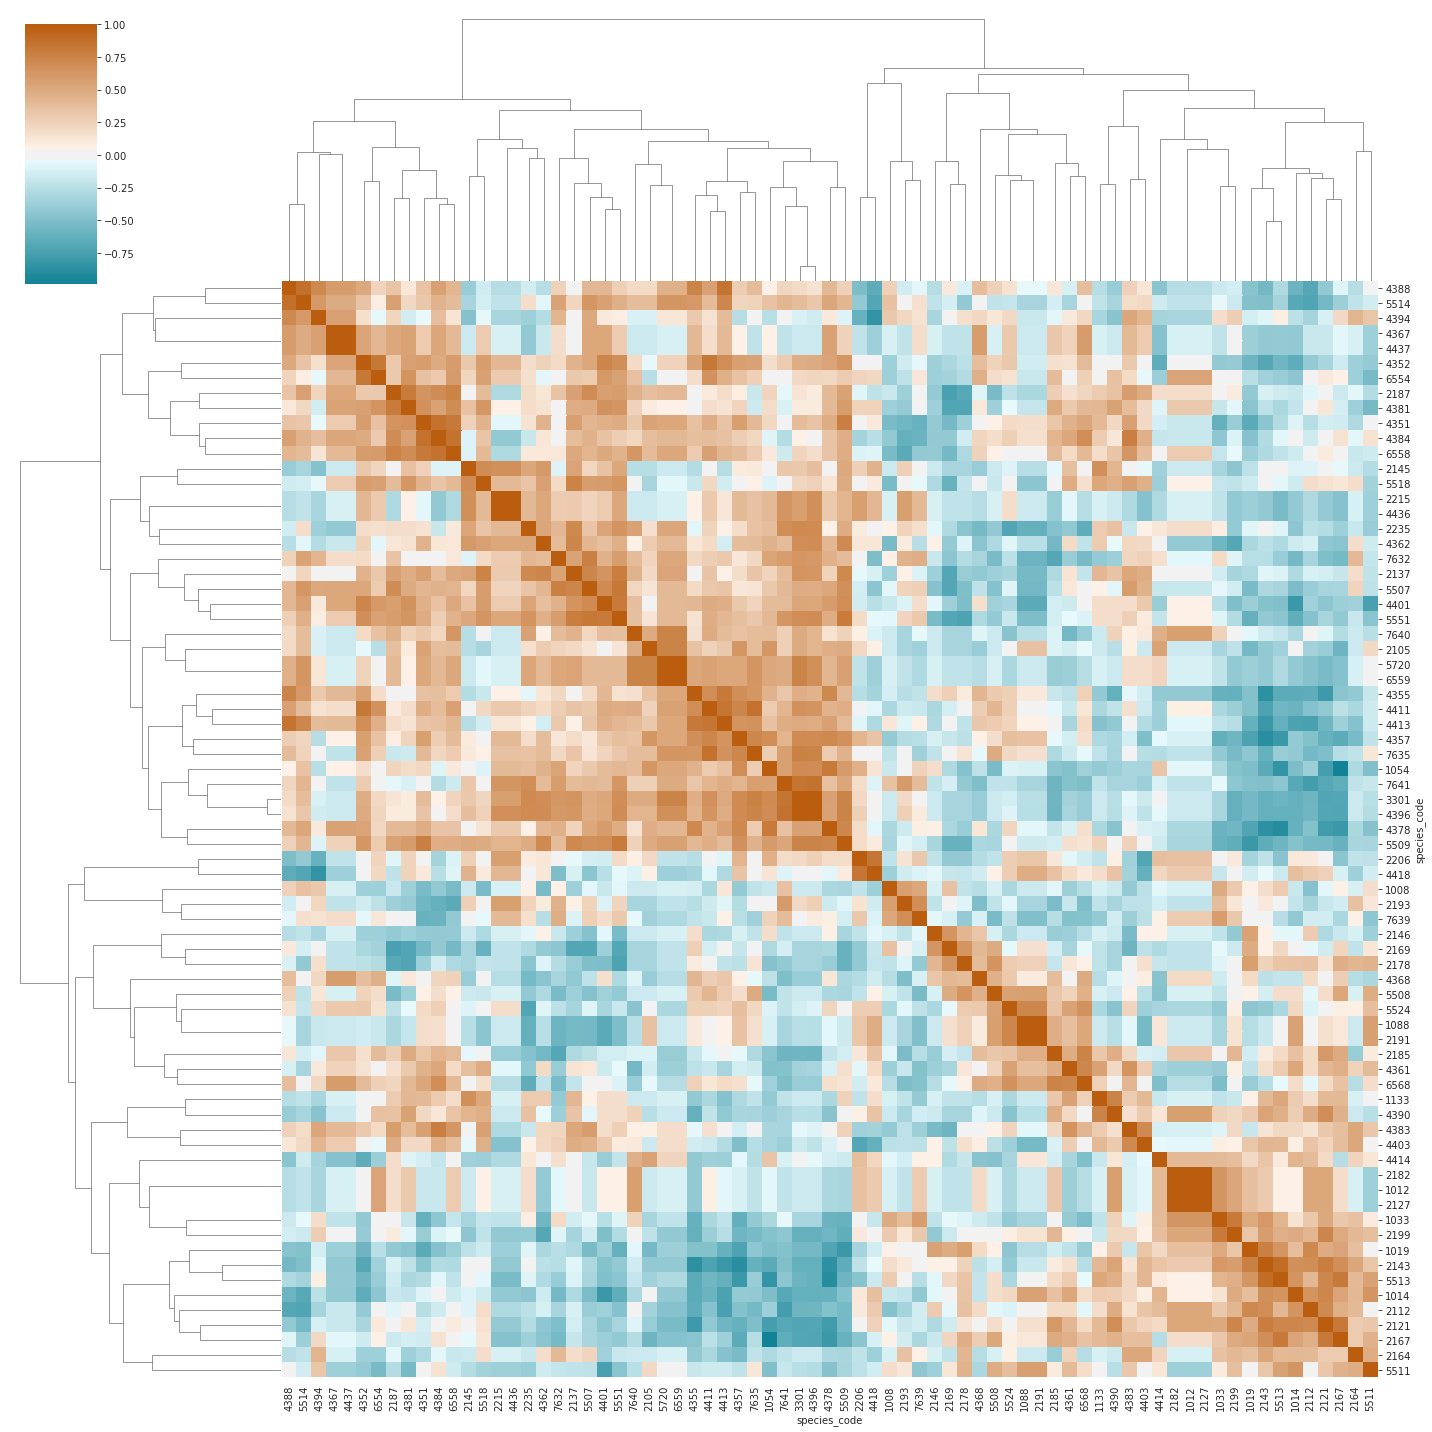

In [28]:
plt.figure(figsize=(25,20))
sns.clustermap(corr, cmap=cmap, figsize=(20,20))

#### Lake 239

In [29]:
corr = calculate_corr(239)

<Figure size 1800x1440 with 0 Axes>

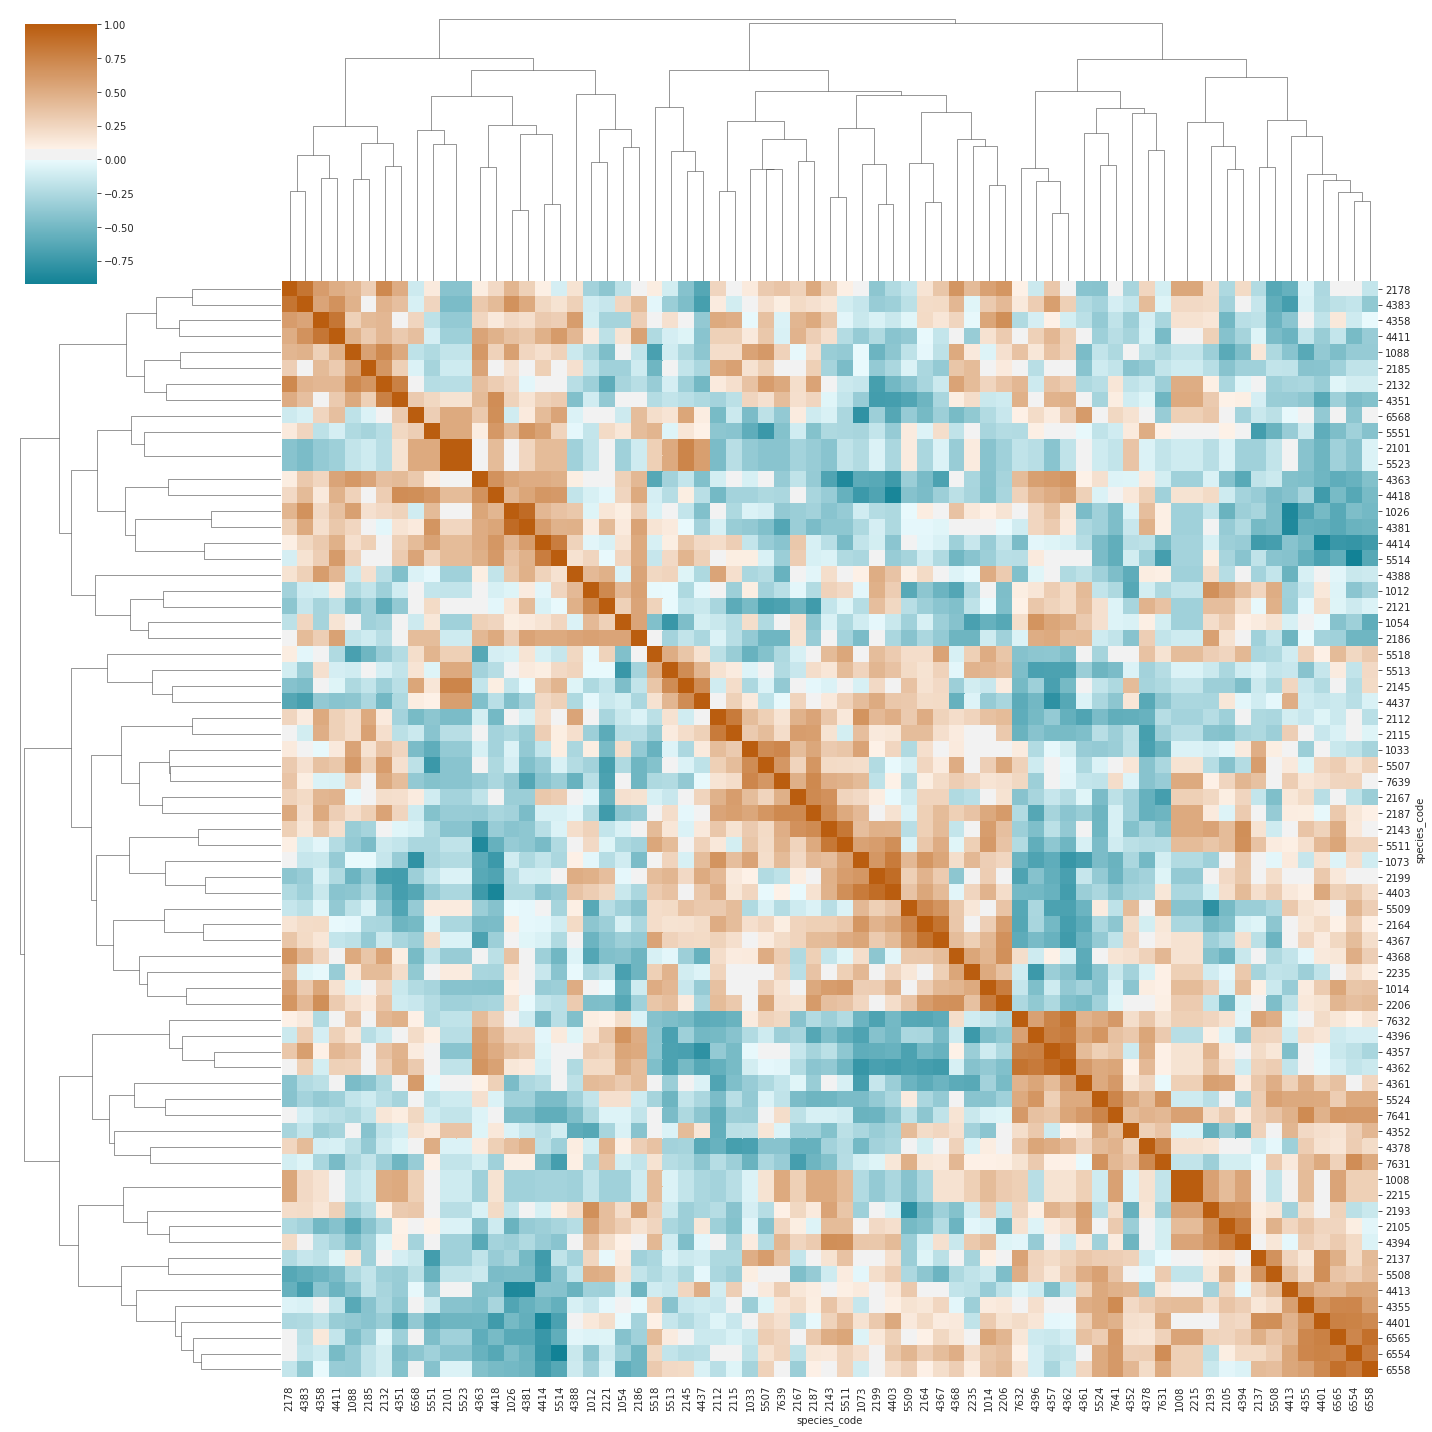

In [30]:
plt.figure(figsize=(25,20))
sns.clustermap(corr, cmap=cmap, figsize=(20,20))

#### Lake 373

In [31]:
corr = calculate_corr(373)

<Figure size 1800x1440 with 0 Axes>

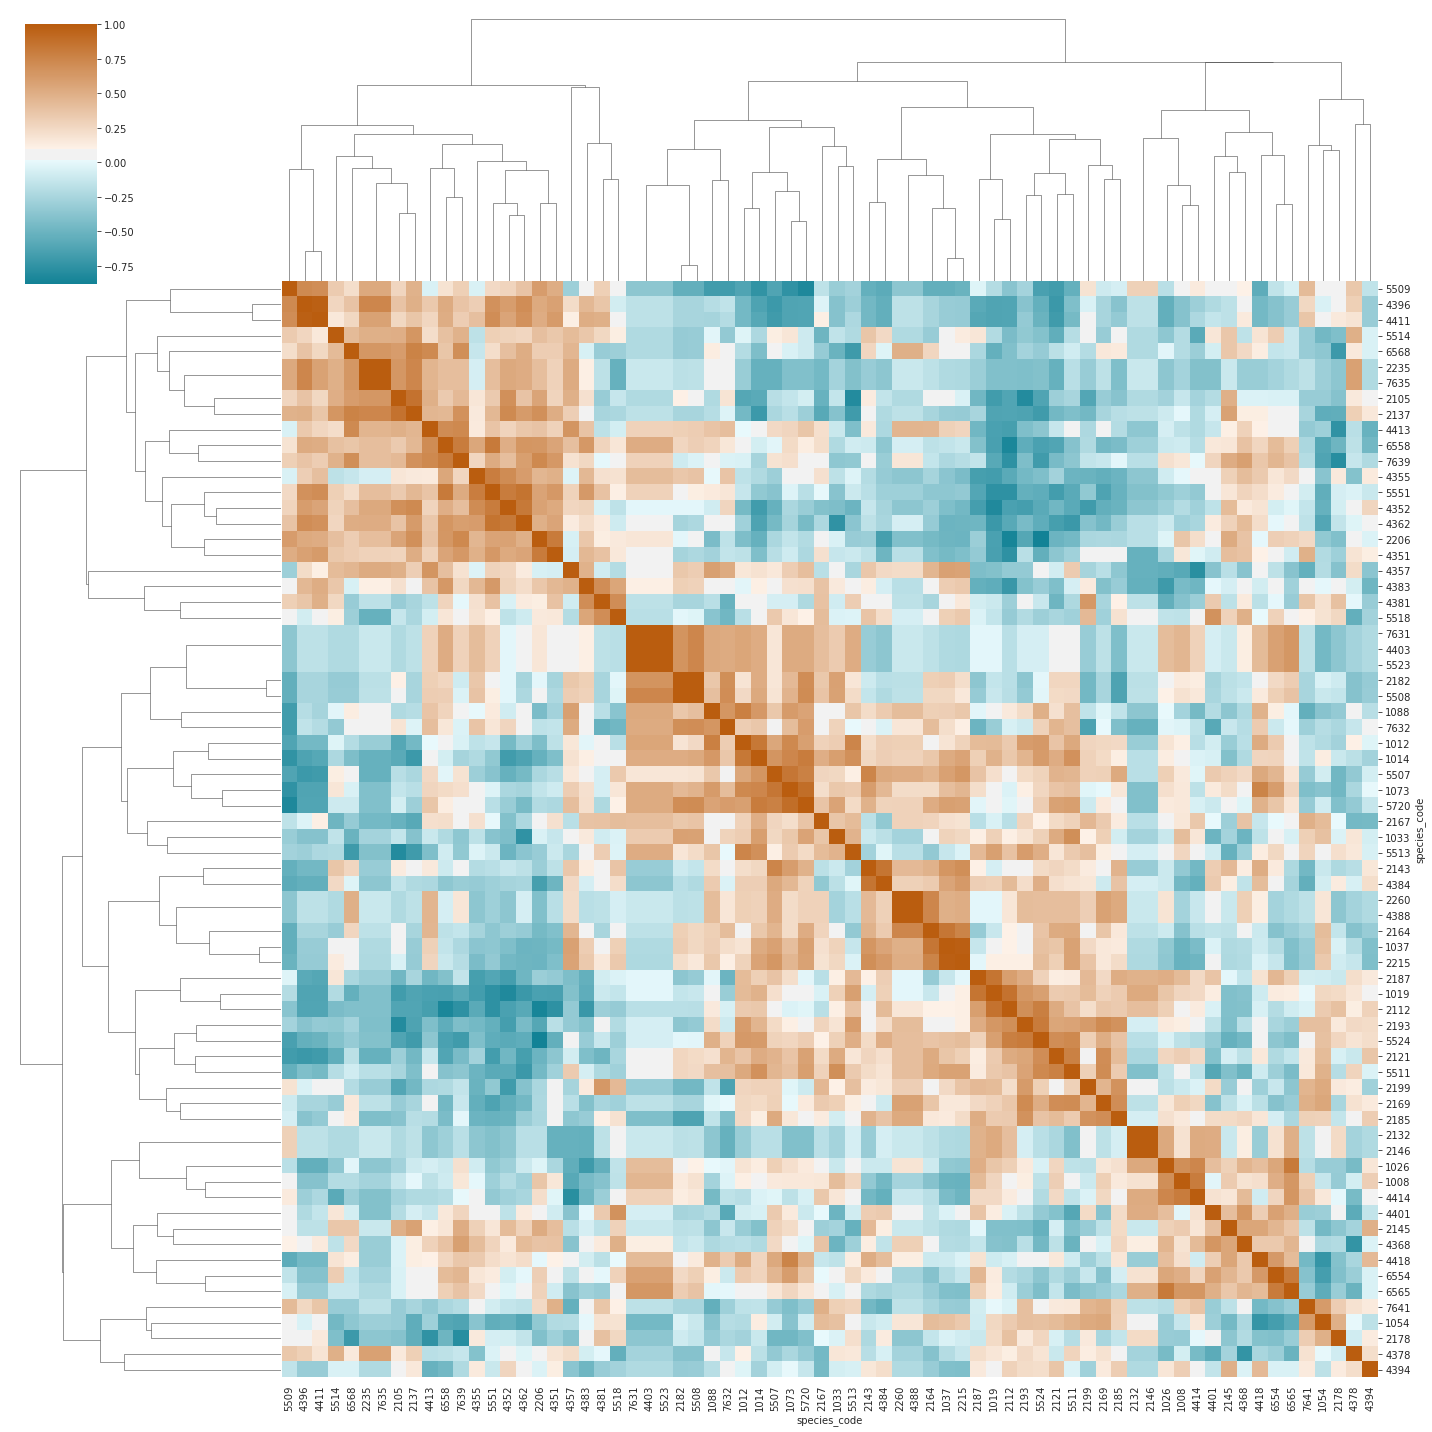

In [32]:
plt.figure(figsize=(25,20))
sns.clustermap(corr, cmap=cmap, figsize=(20,20))

#### Lake 442

In [33]:
corr = calculate_corr(442)

<Figure size 1800x1440 with 0 Axes>

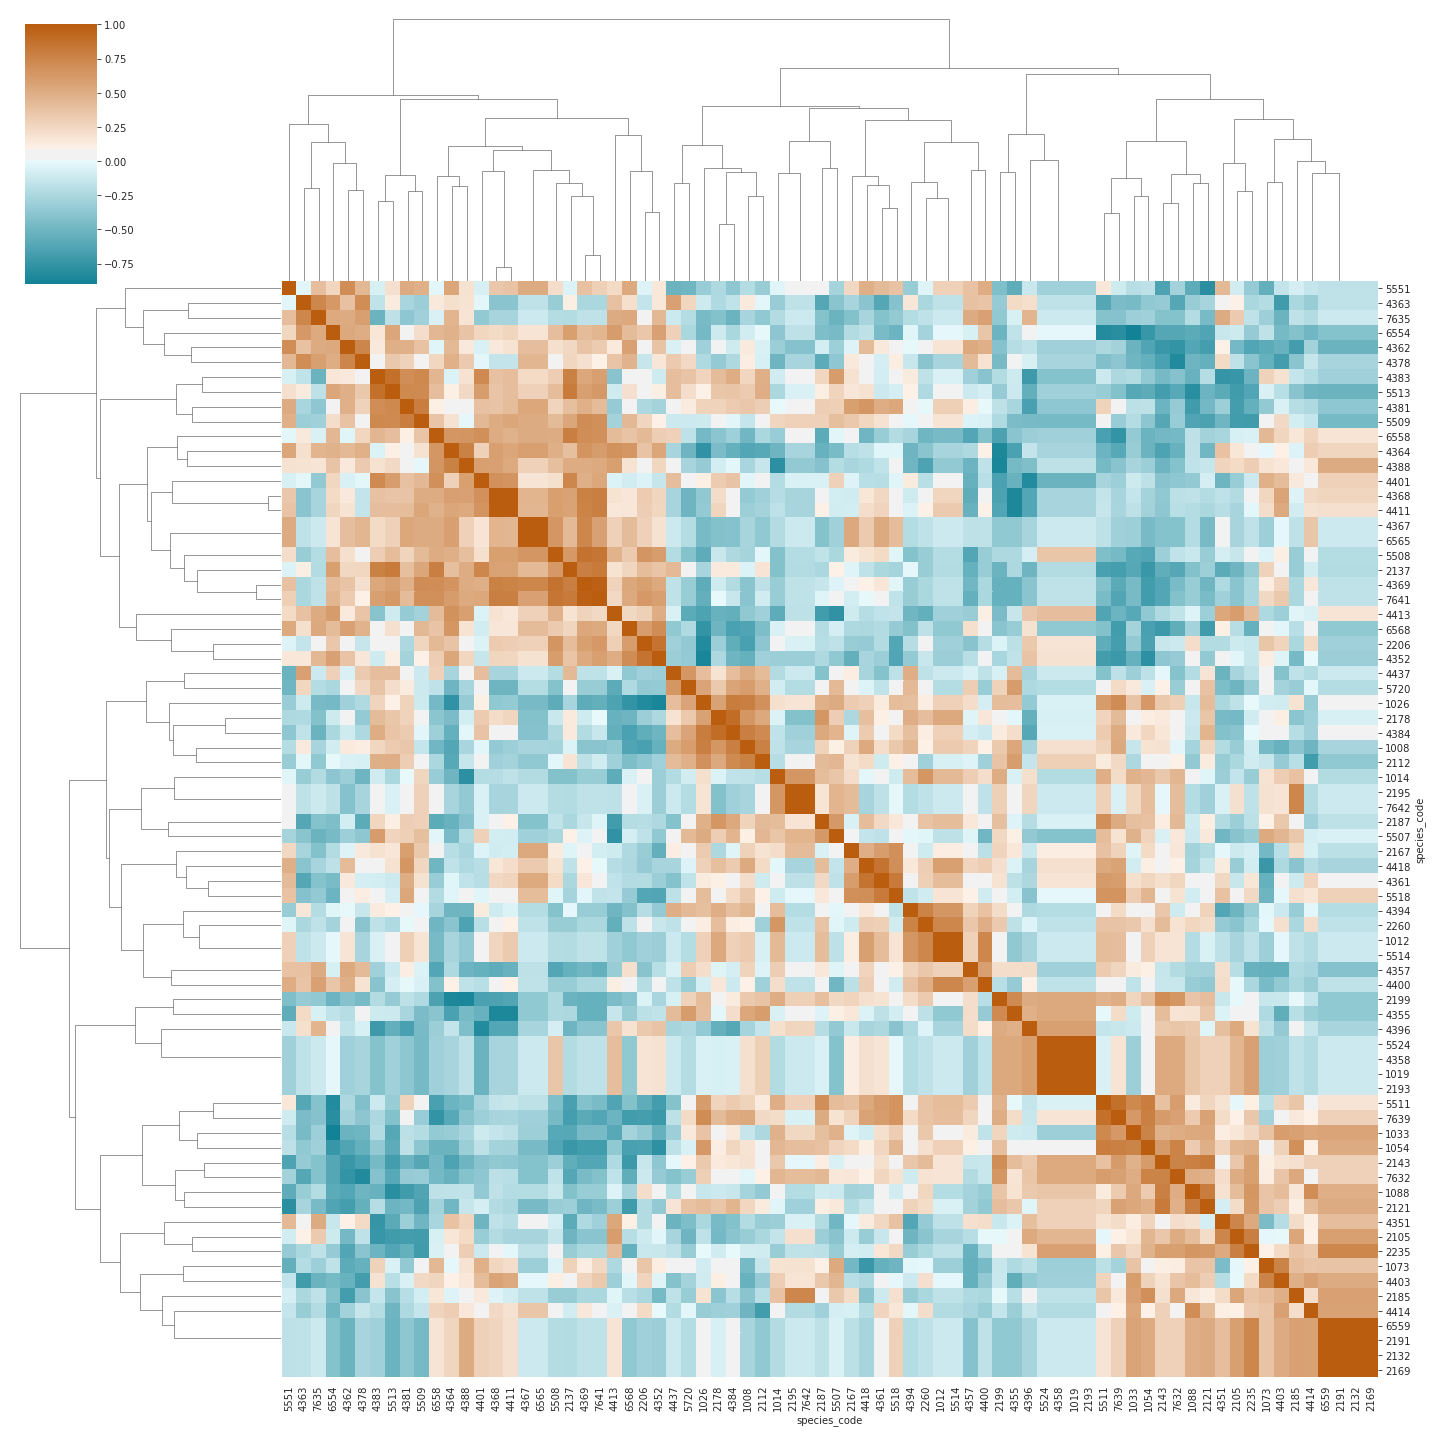

In [34]:
plt.figure(figsize=(25,20))
sns.clustermap(corr, cmap=cmap, figsize=(20,20))

#### Lake 470

In [35]:
corr = calculate_corr(470)

<Figure size 1800x1440 with 0 Axes>

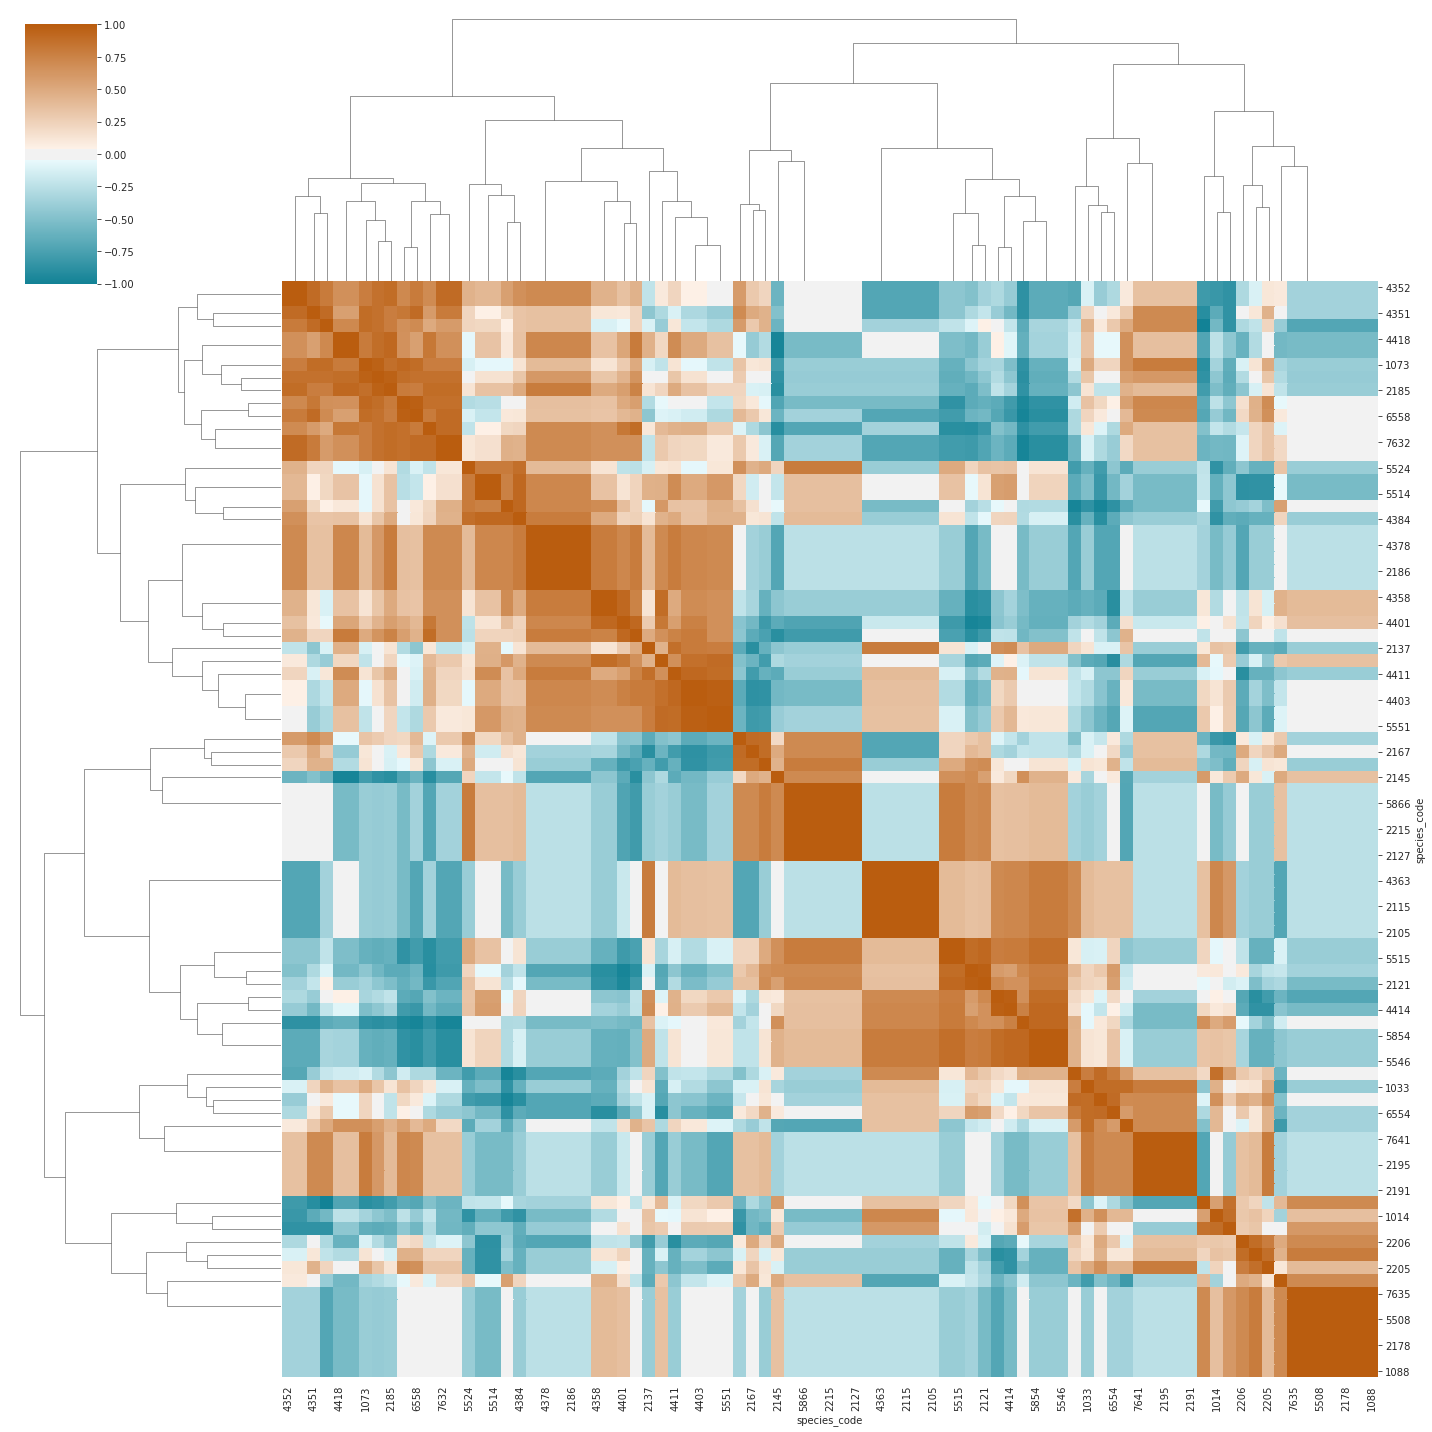

In [36]:
plt.figure(figsize=(25,20))
sns.clustermap(corr, cmap=cmap, figsize=(20,20))

#### Lake 625

In [37]:
corr = calculate_corr(625)

<Figure size 1800x1440 with 0 Axes>

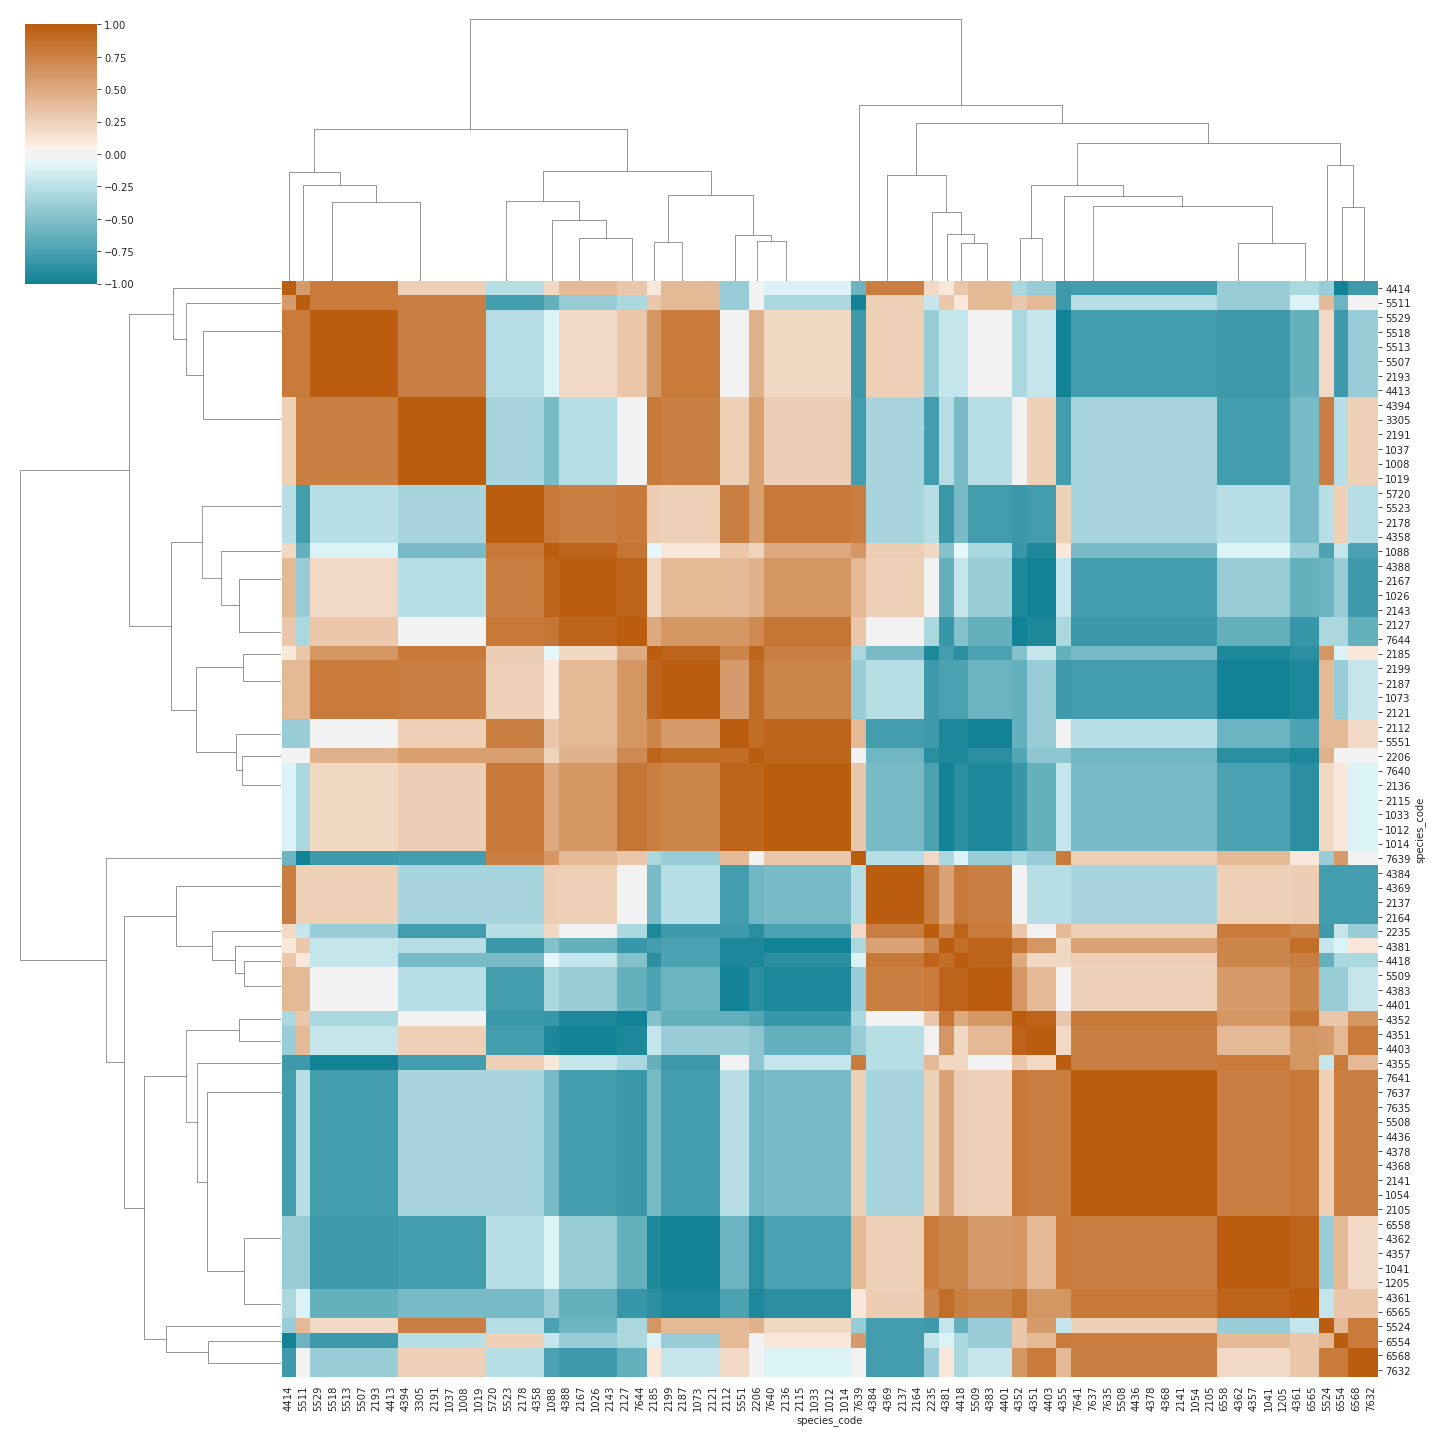

In [38]:
plt.figure(figsize=(25,20))
sns.clustermap(corr, cmap=cmap, figsize=(20,20))

#### Lake 626

In [39]:
corr = calculate_corr(626)

<Figure size 1800x1440 with 0 Axes>

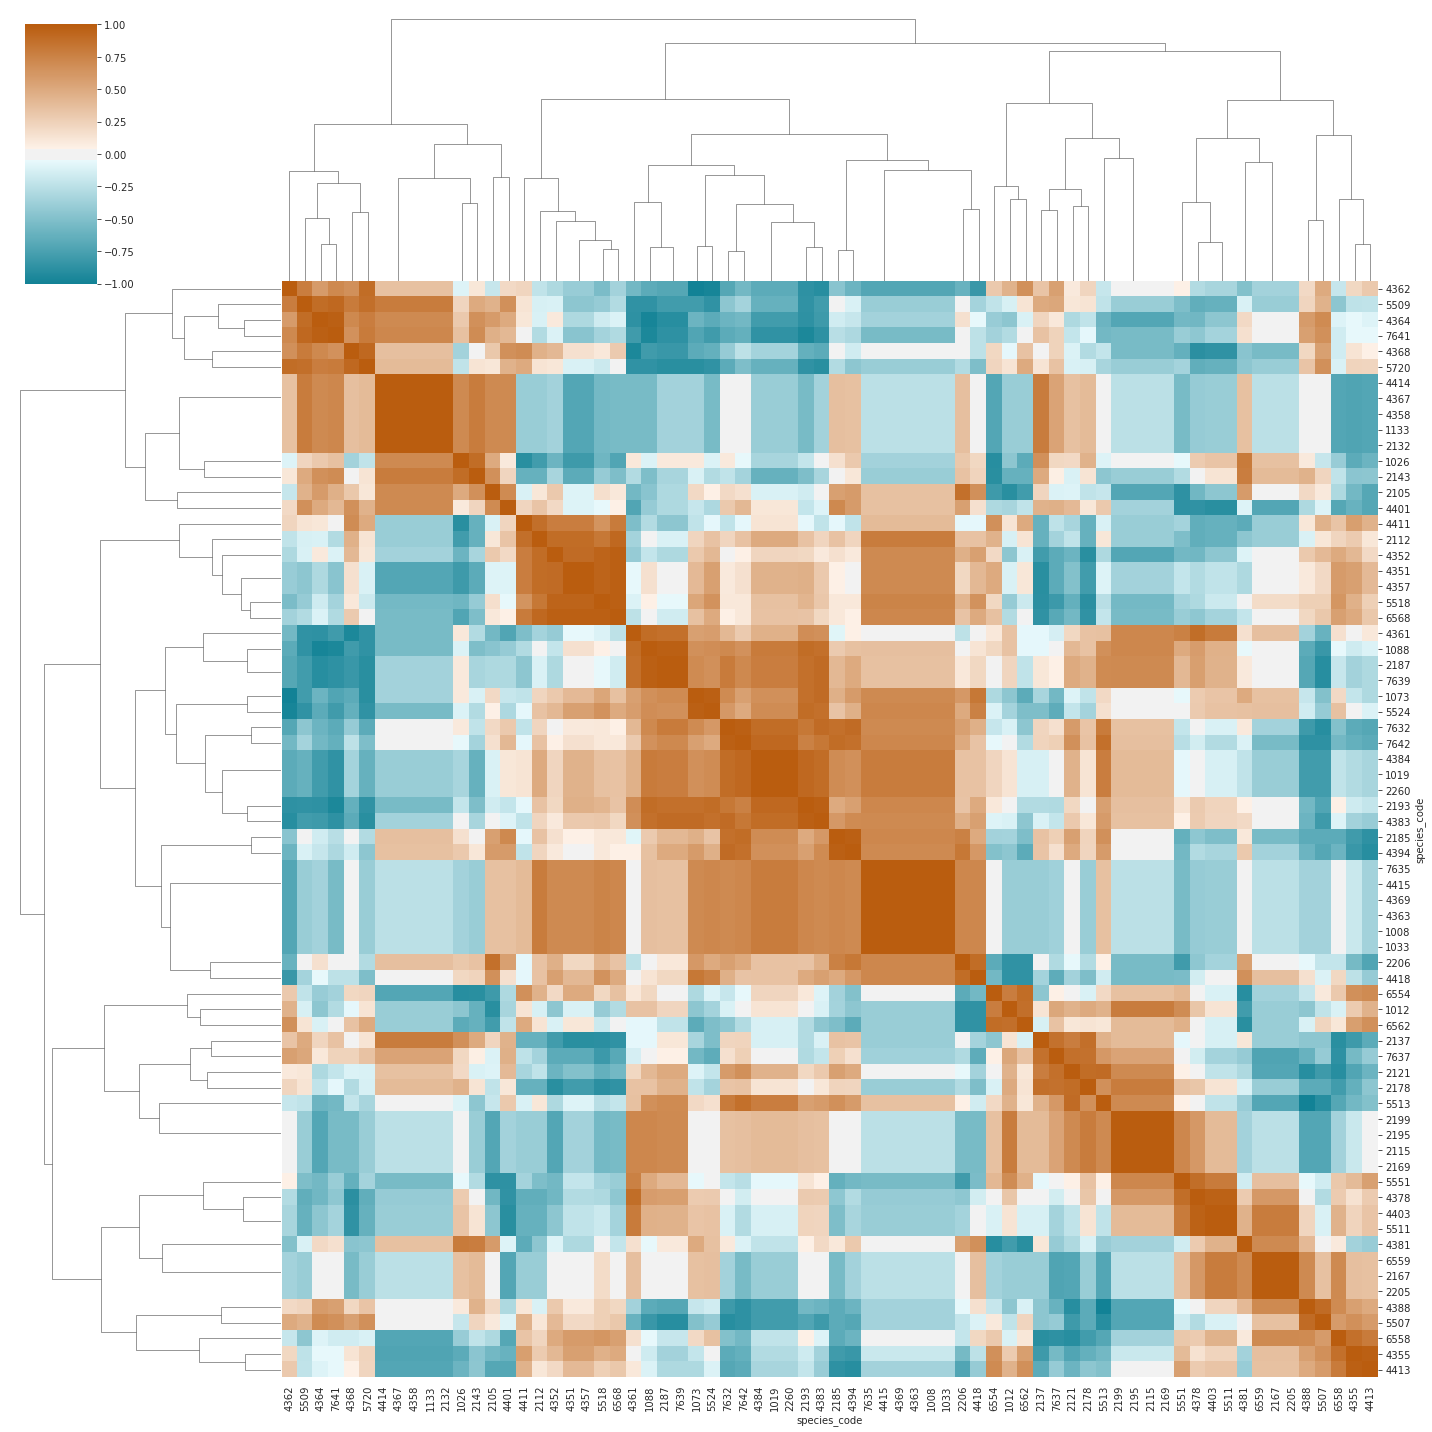

In [40]:
plt.figure(figsize=(25,20))
sns.clustermap(corr, cmap=cmap, figsize=(20,20))

#### Lake 658

In [41]:
corr = calculate_corr(658)

<Figure size 1800x1440 with 0 Axes>

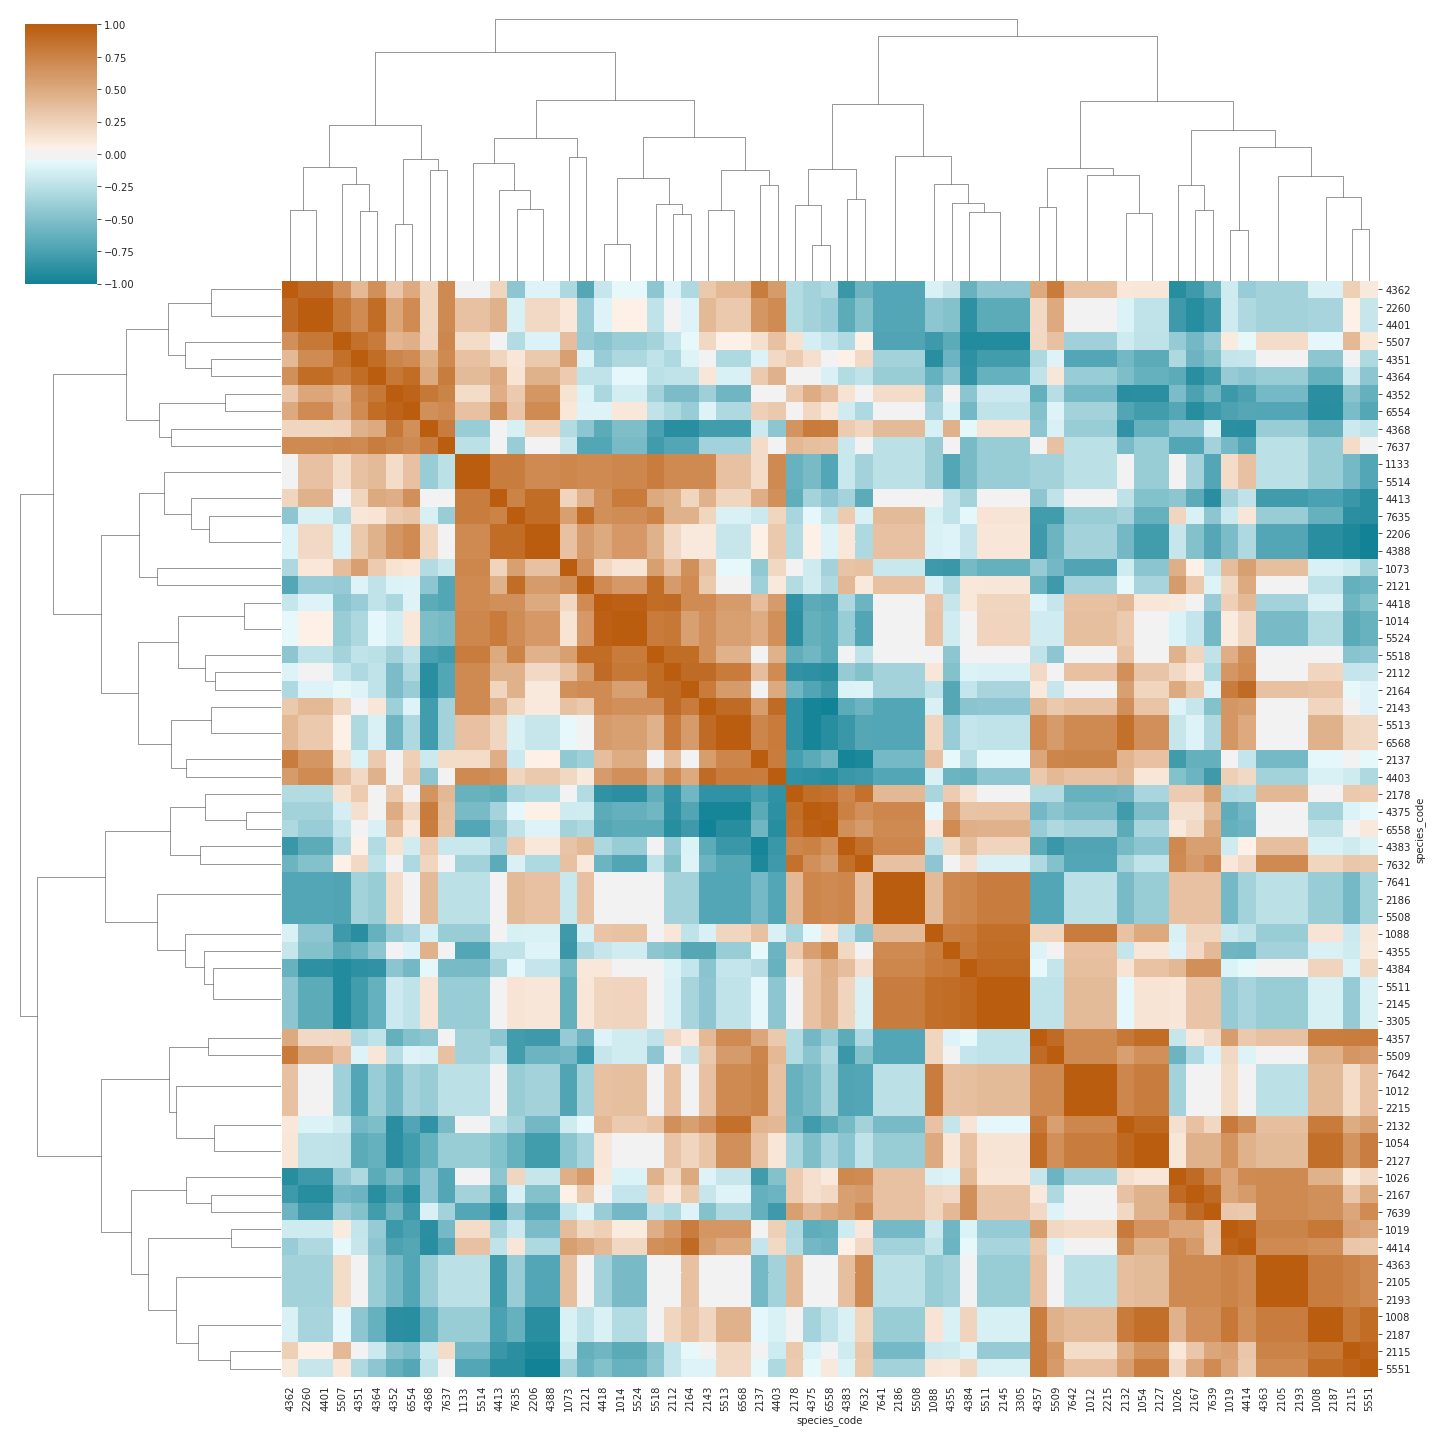

In [42]:
plt.figure(figsize=(25,20))
sns.clustermap(corr, cmap=cmap, figsize=(20,20))

#### Output images and correlation tables

In [13]:
lakes = phytotax['Lake'].unique()

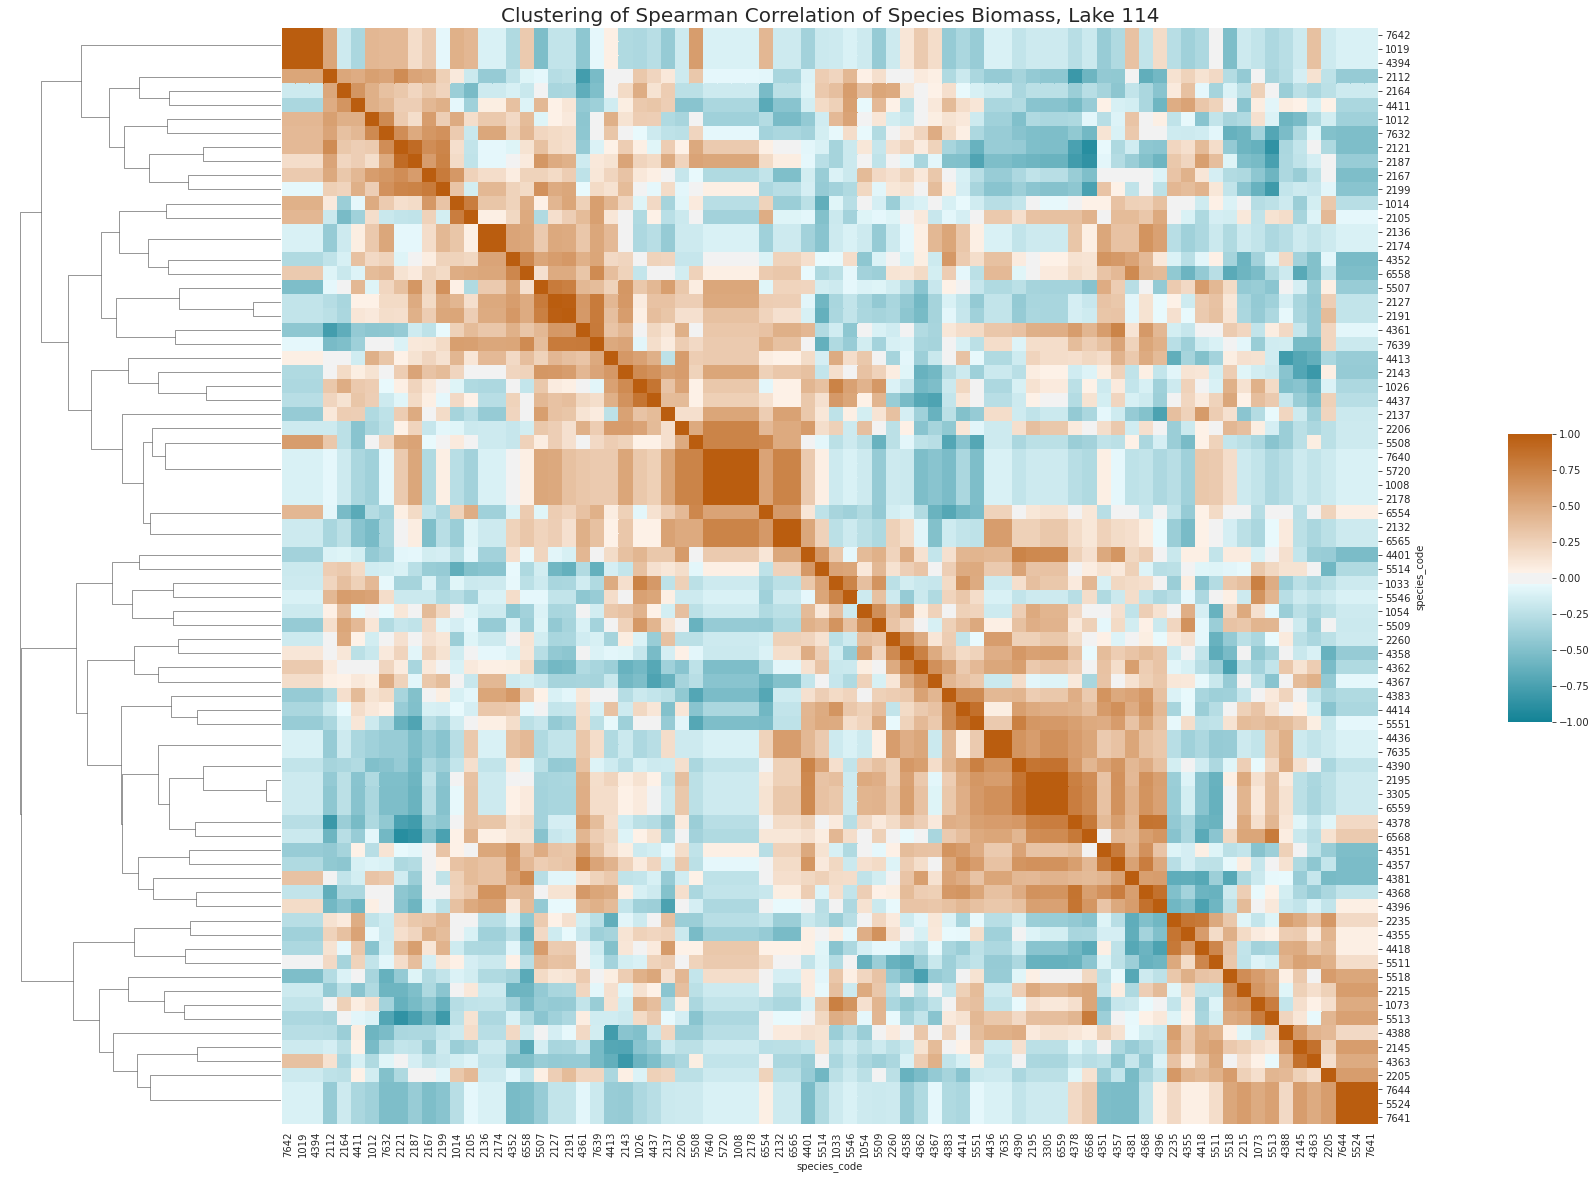

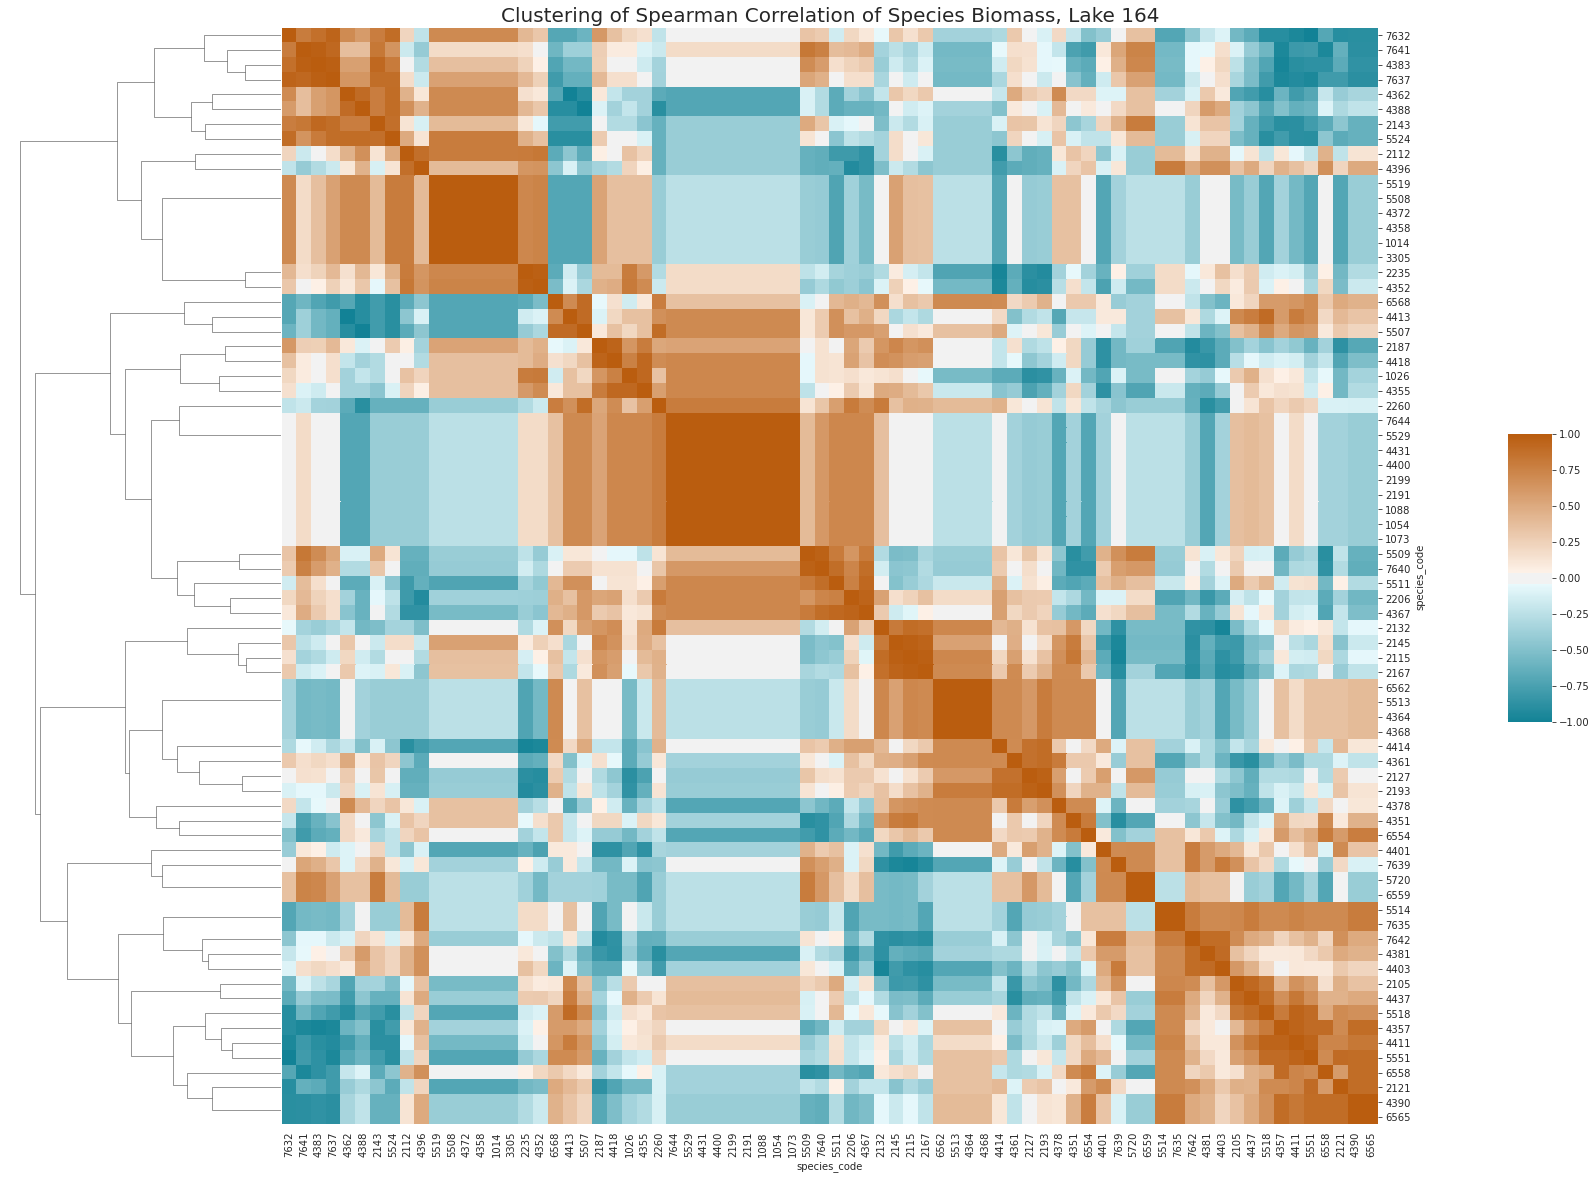

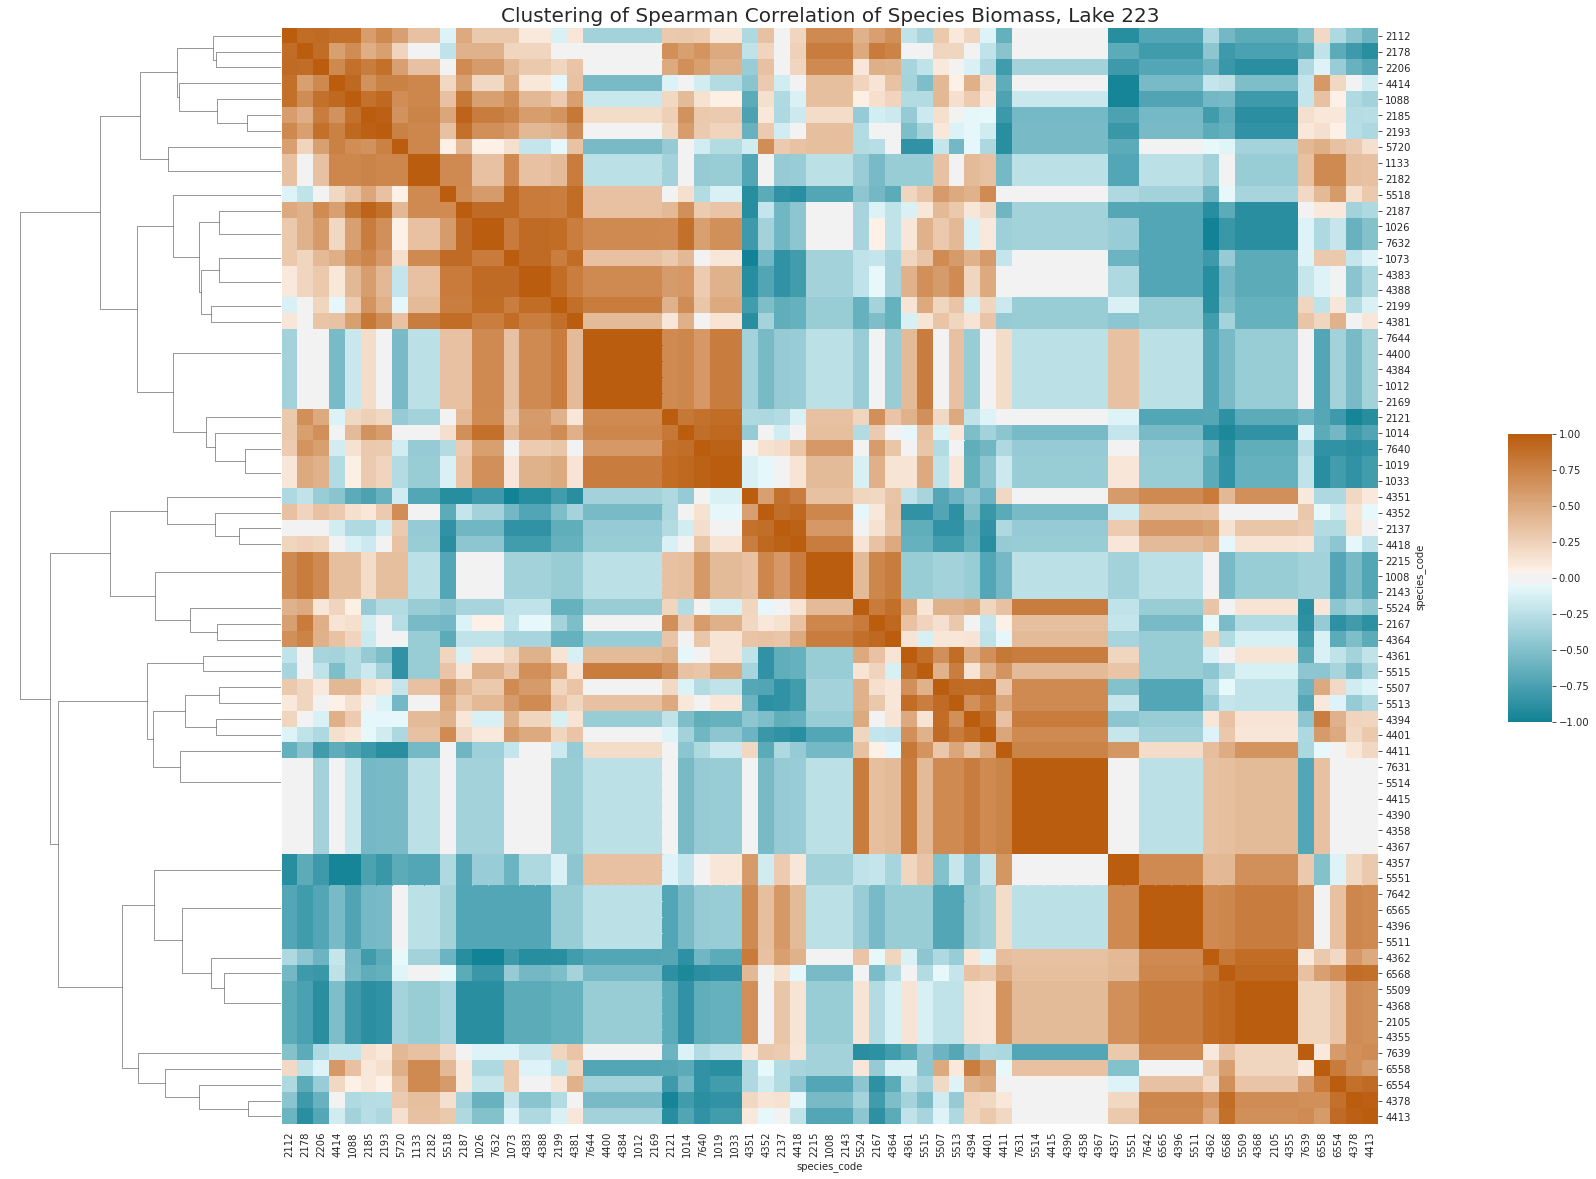

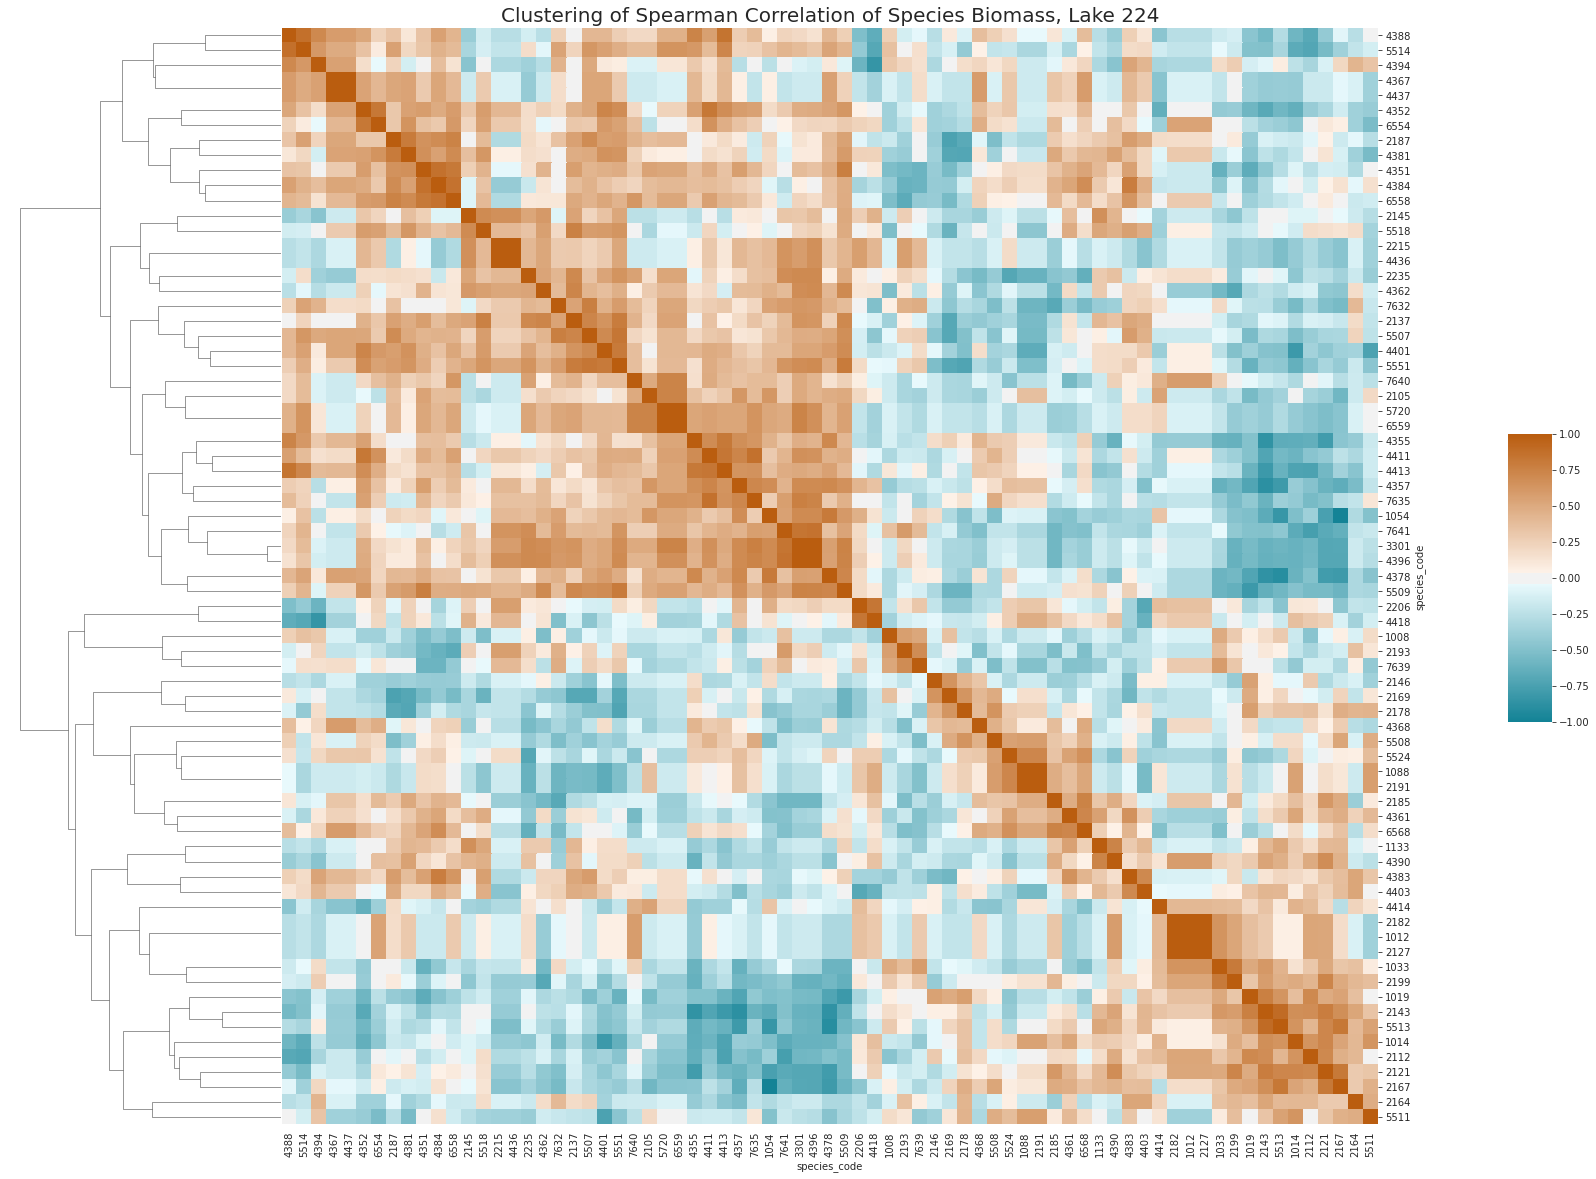

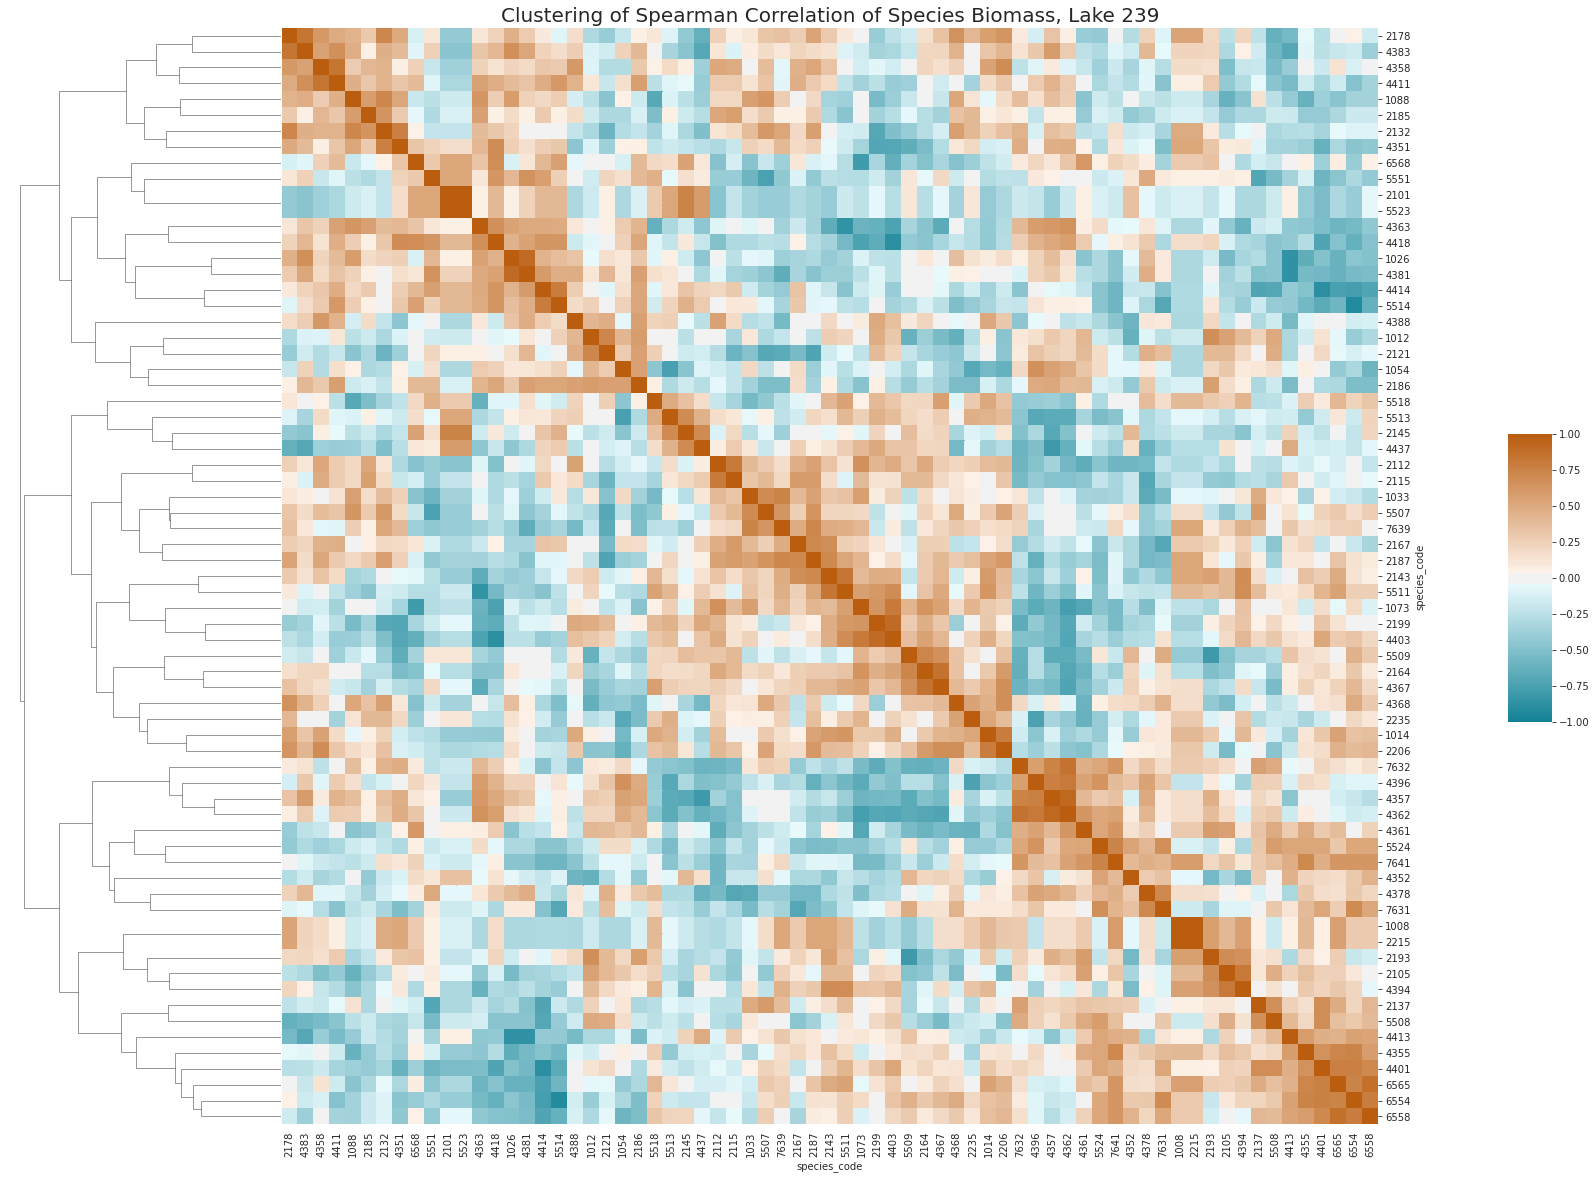

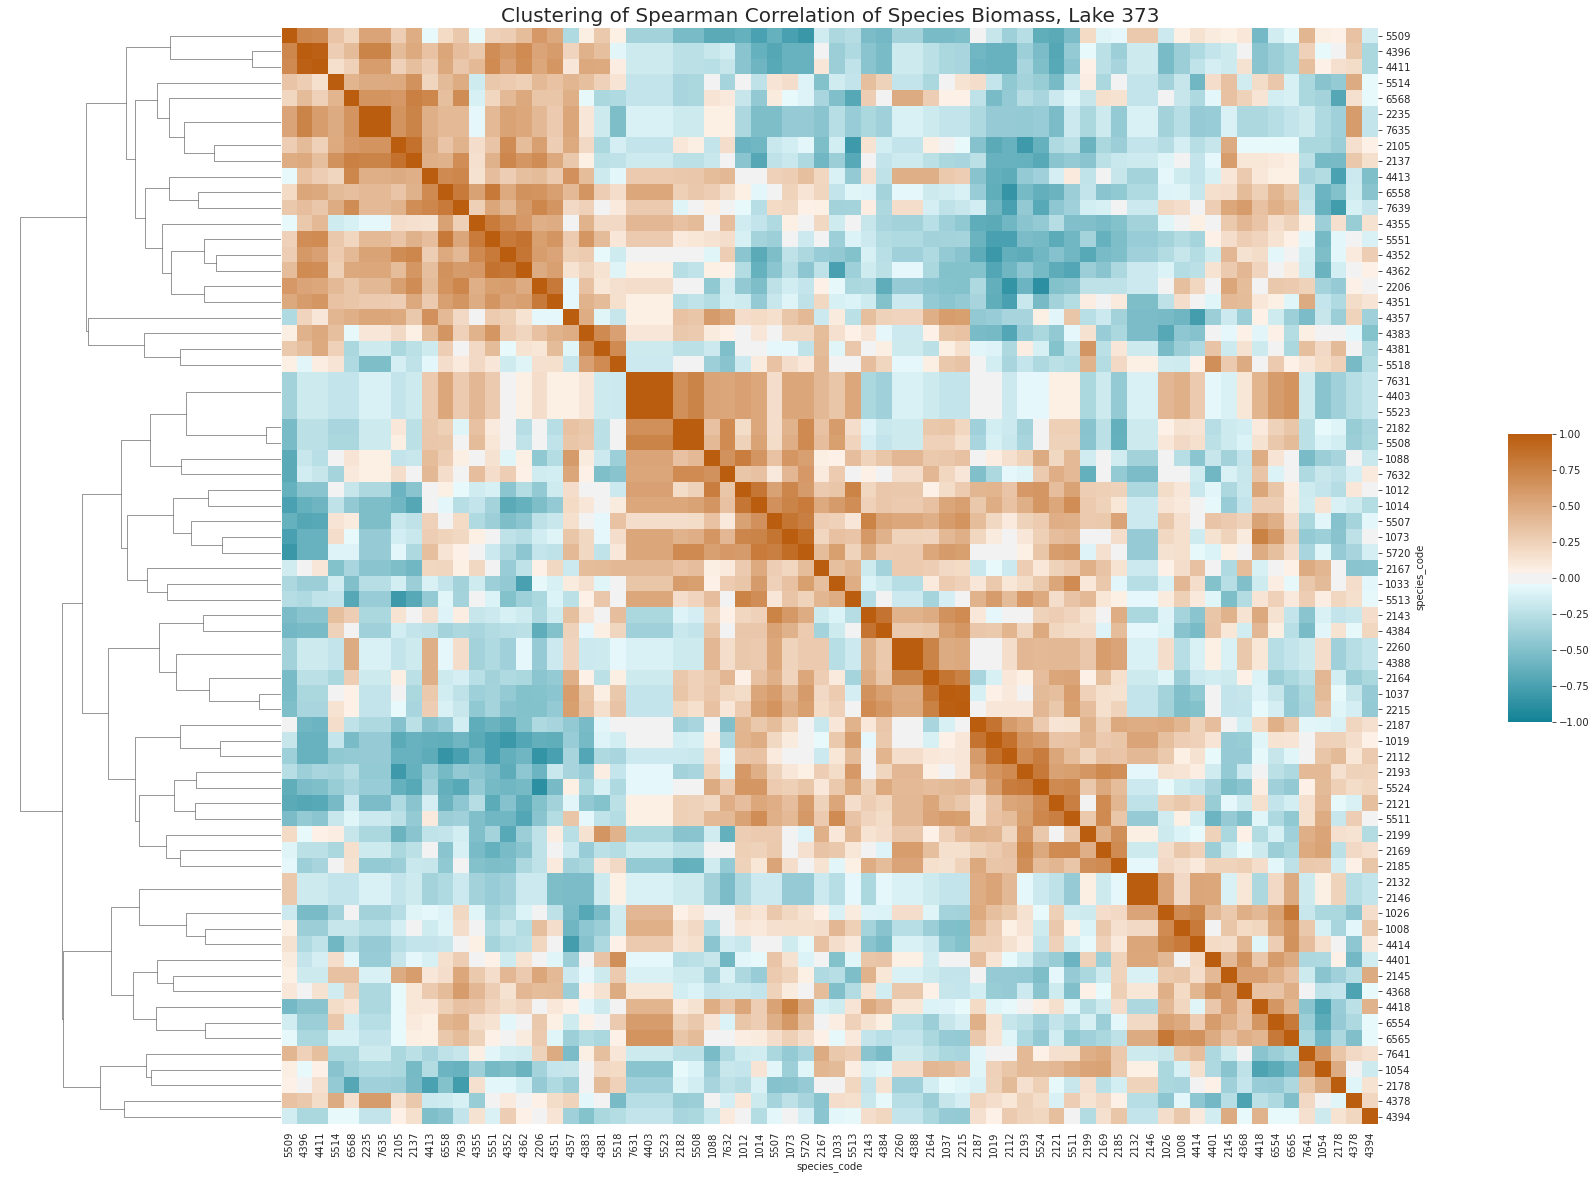

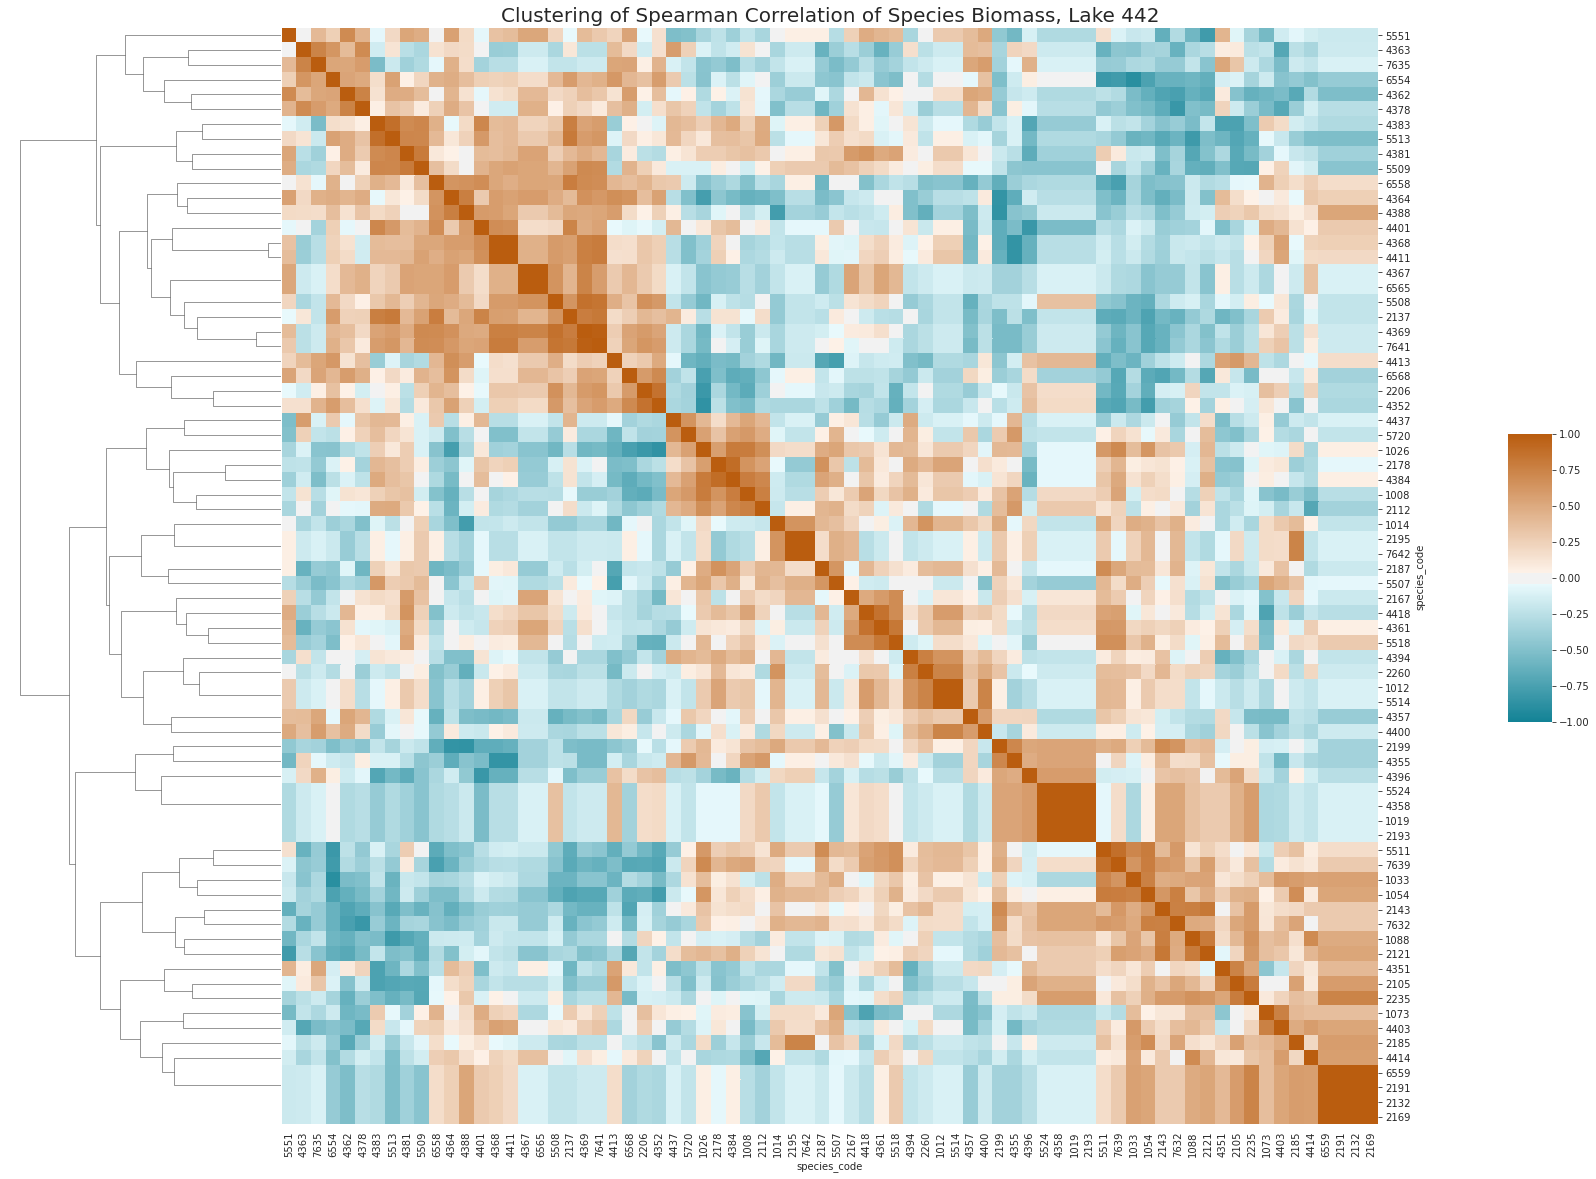

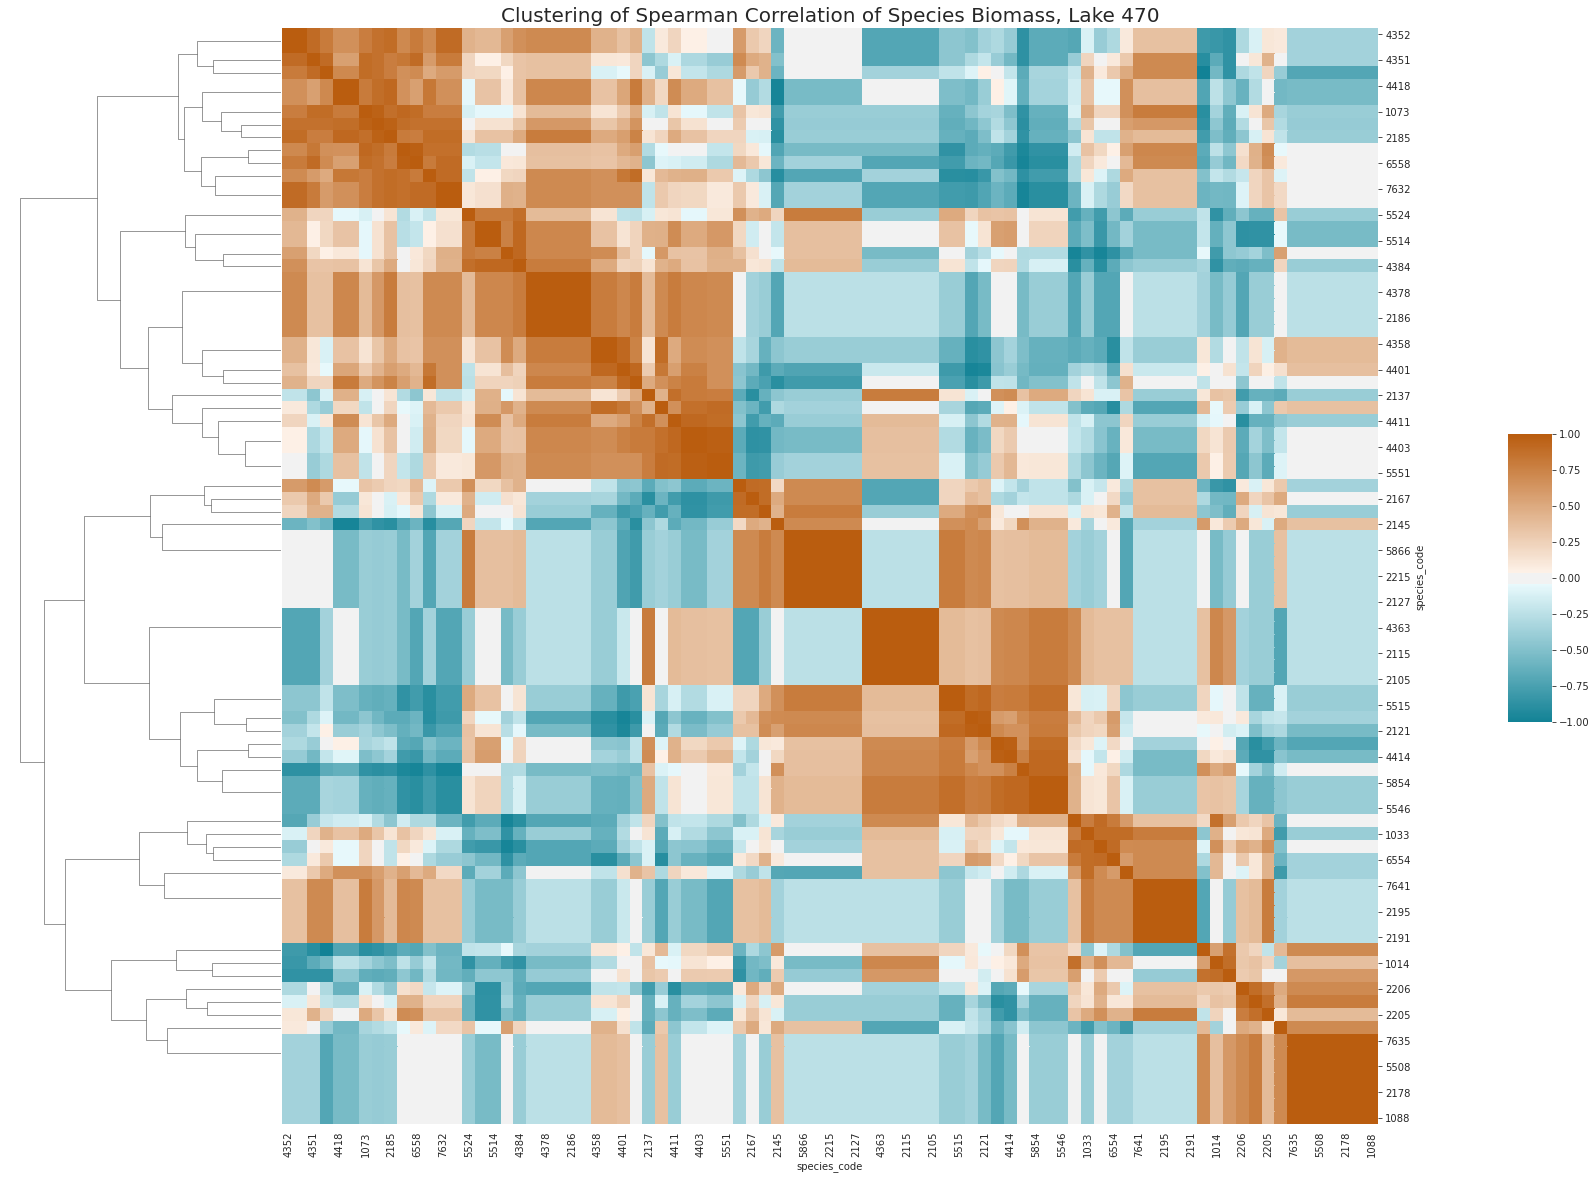

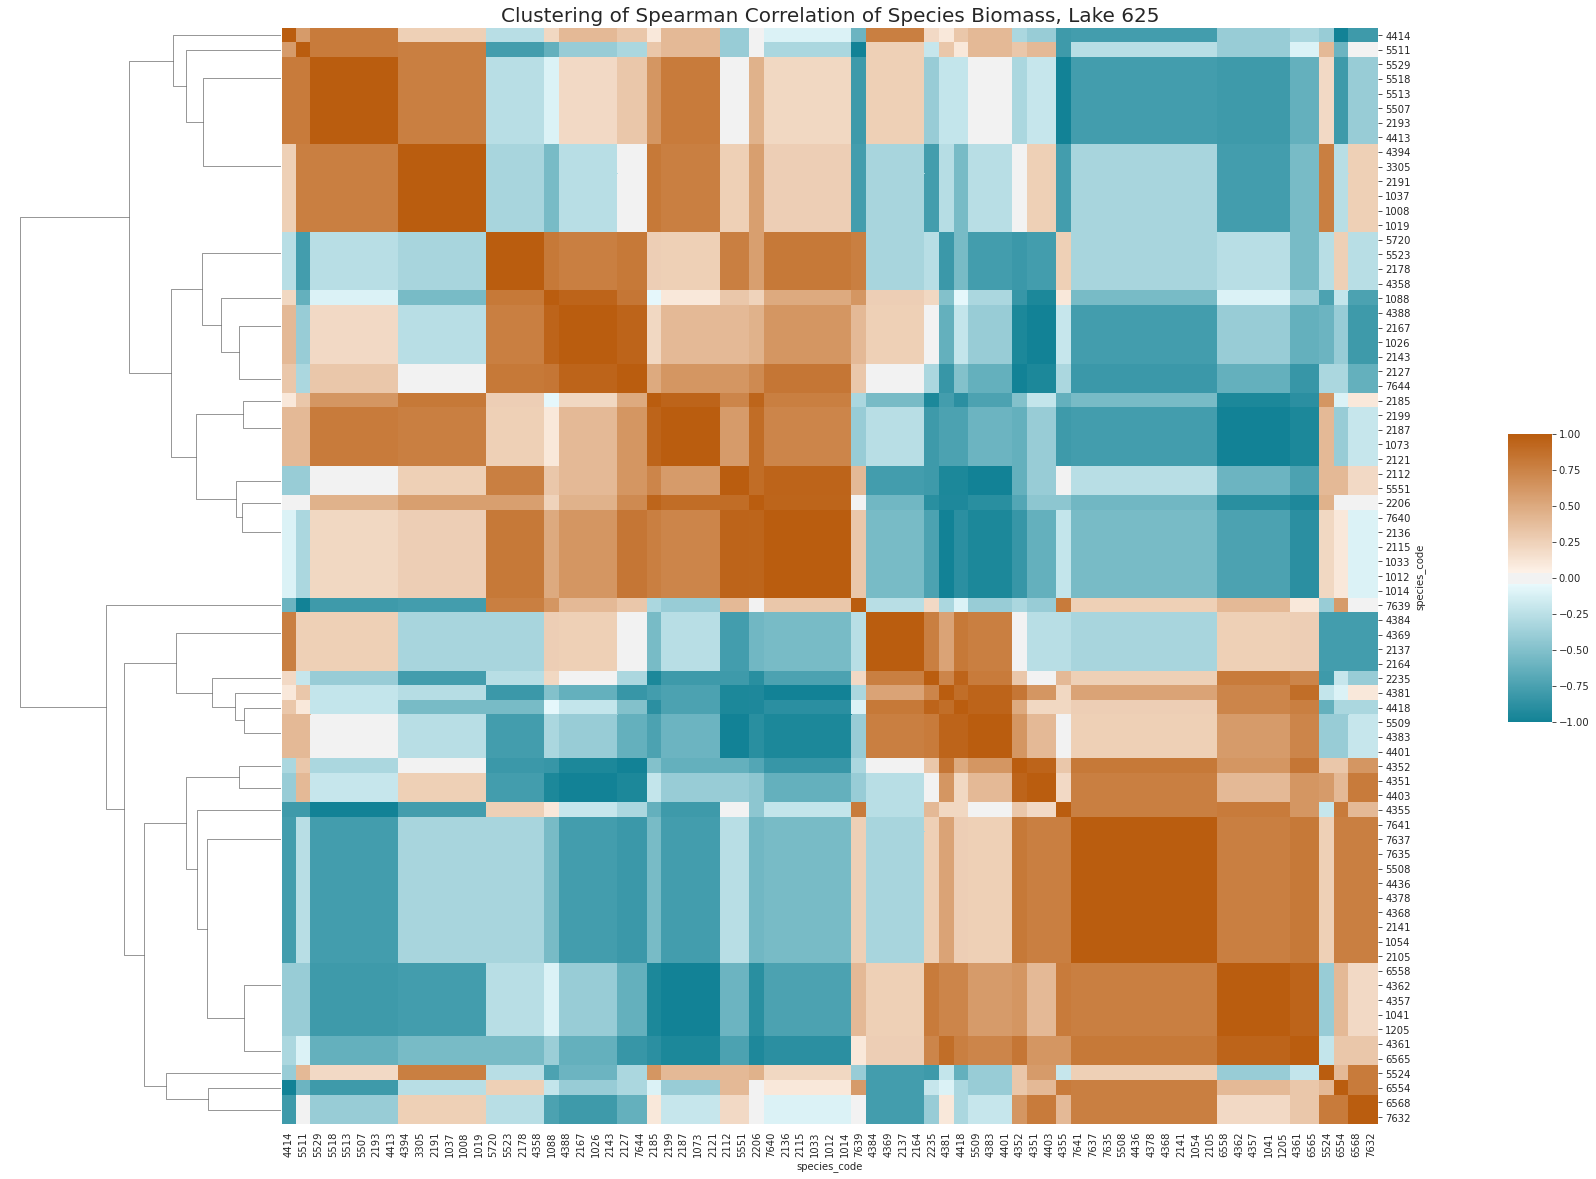

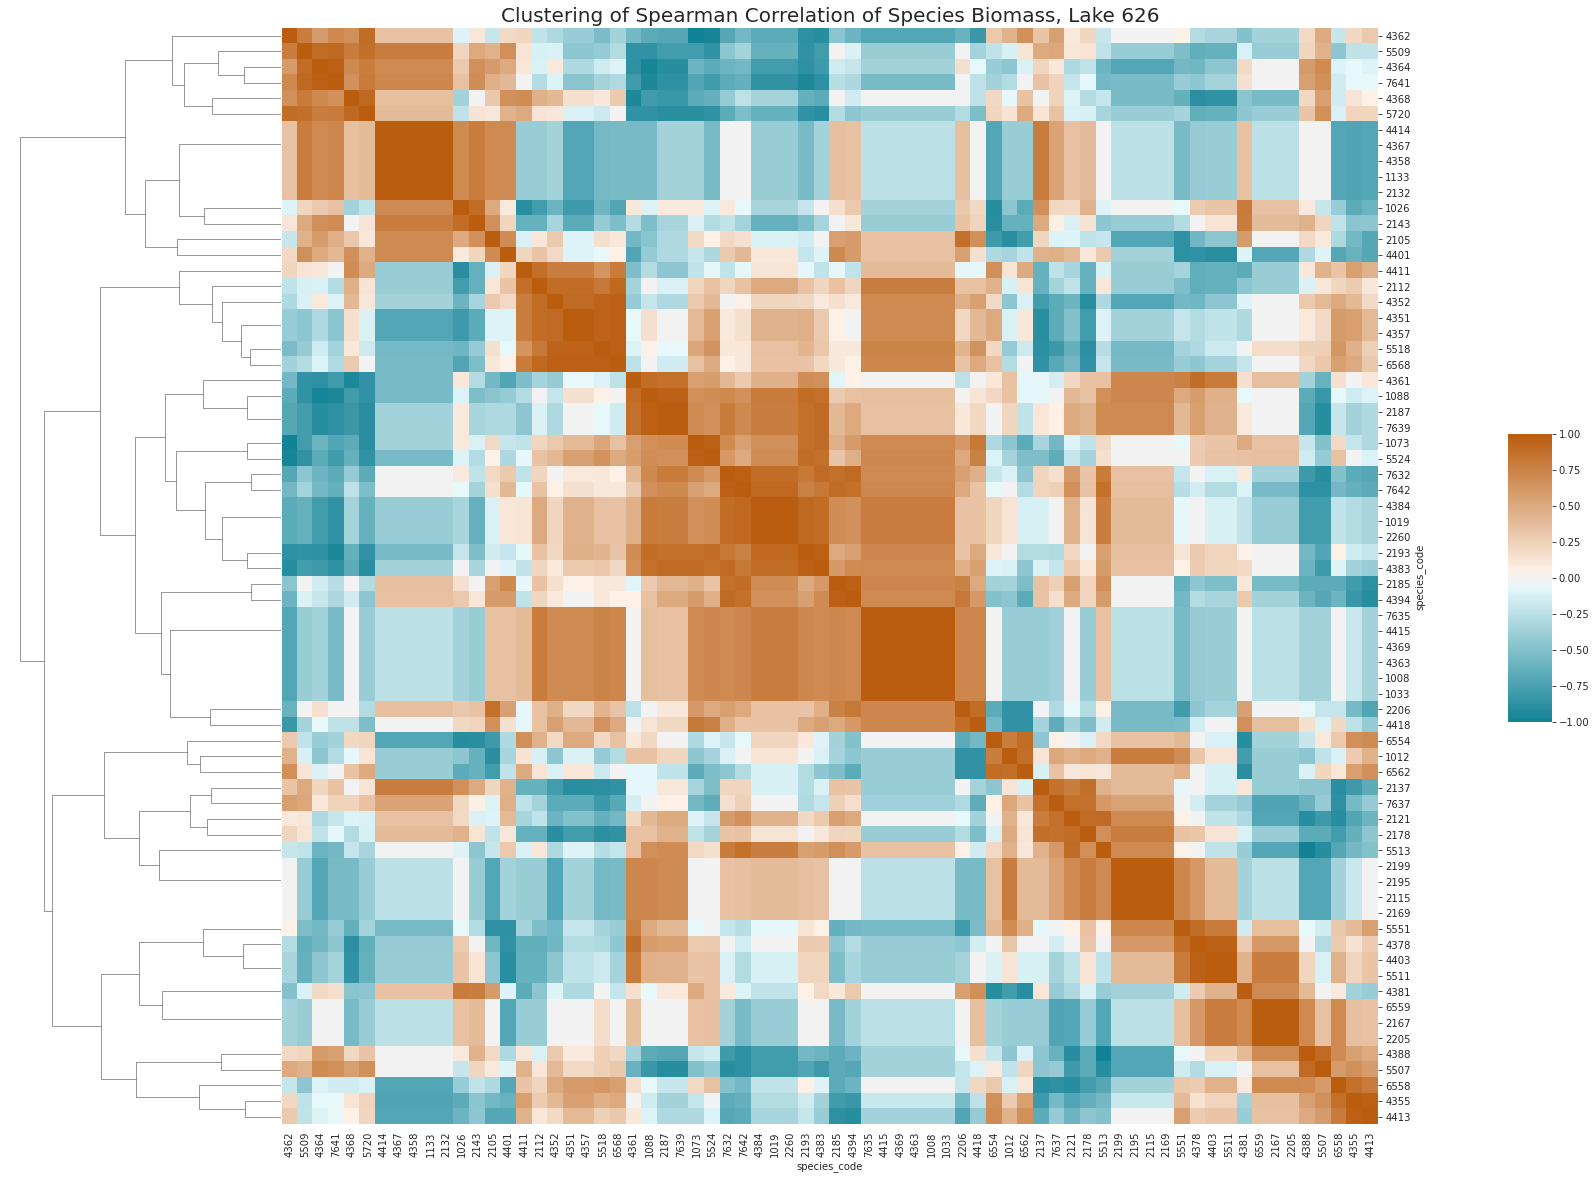

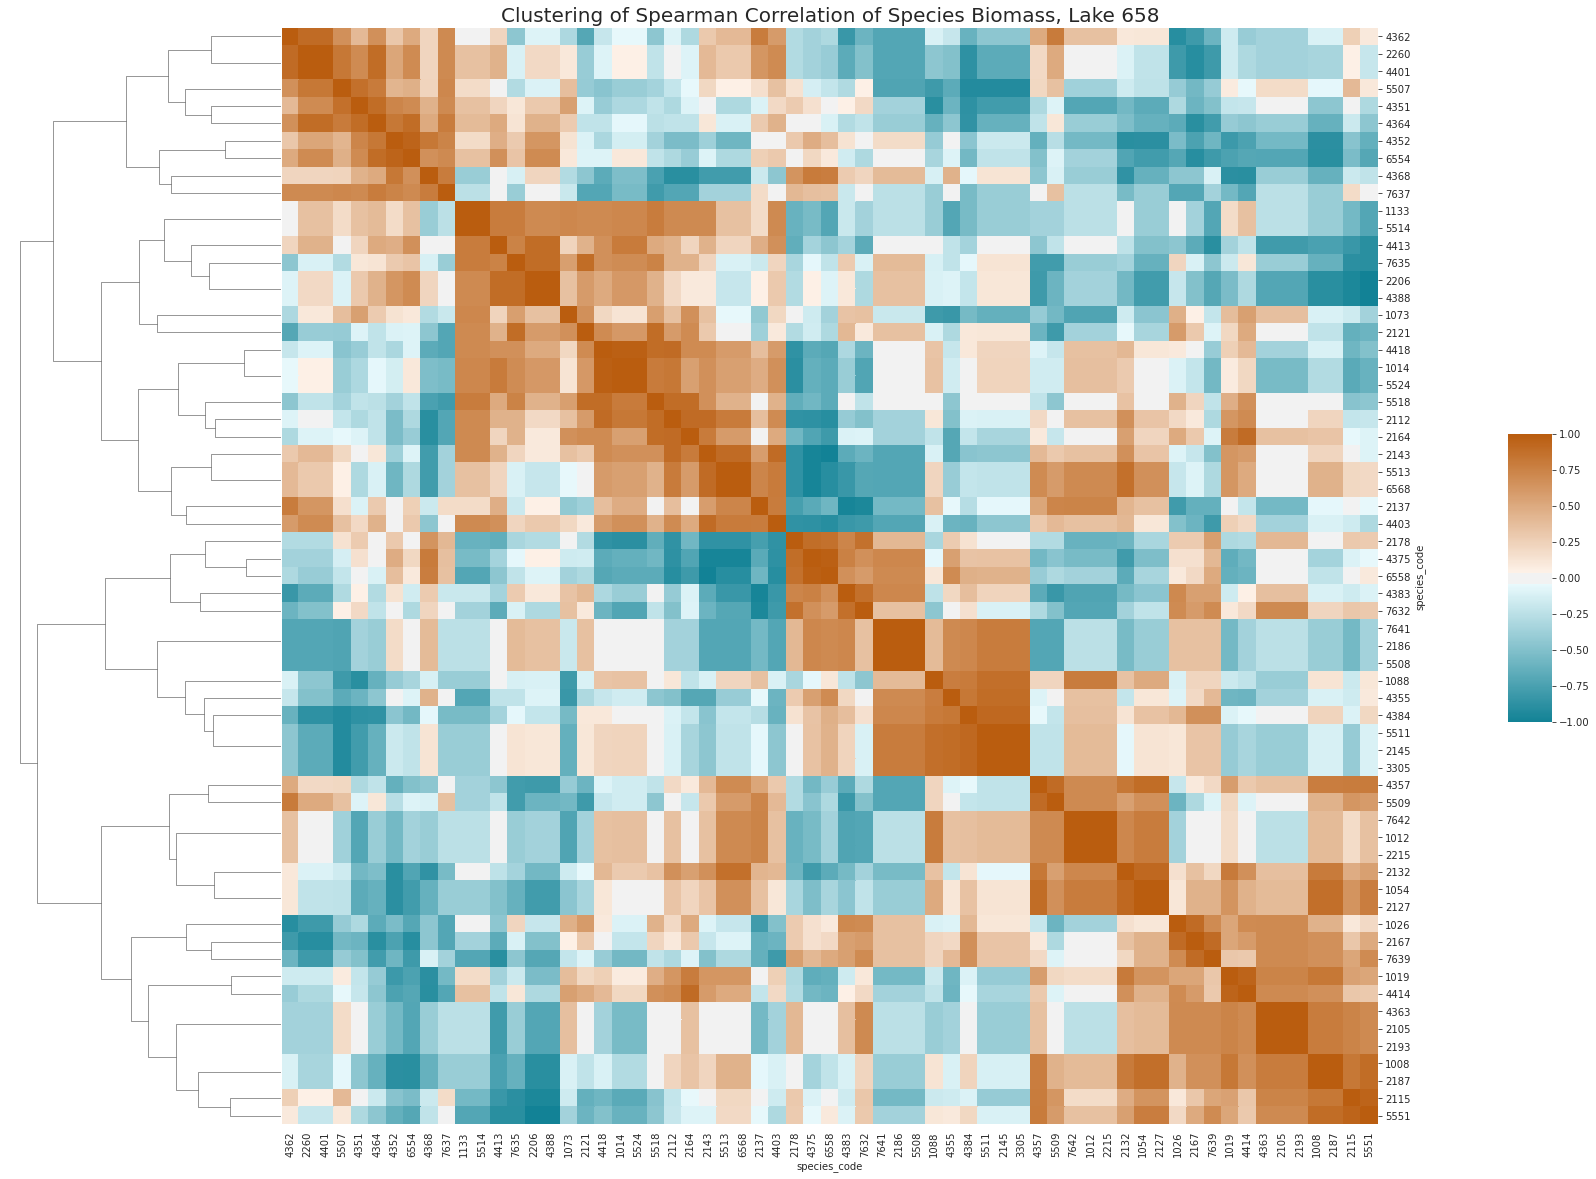

In [14]:
for lake in lakes:
    corr = calculate_corr(lake)
    g = sns.clustermap(corr, cmap=cmap, figsize=(20,20), cbar_pos=(1.05, .32, .03, .2), vmin=-1.0, vmax=1.0)
    g.ax_col_dendrogram.remove()
    g.ax_heatmap.set_title('Clustering of Spearman Correlation of Species Biomass, Lake {}'.format(lake), fontsize=20)
    g.savefig('YOUR-PATH/hierarchical_clustering_lake{}.png'.format(lake))
    
    corr.to_csv('YOUR-PATH/#DATA/correlation_tables/spearman_correlations_species_biomass_lake{}.csv'.format(lake))